# <font color='mediumvioletred'> Statistical Hypothesis Tests in Python

##### import necessary libraries

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [118]:
# Set default plot settings
plt.rcParams['axes.grid'] = False  # Remove grids
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black

# Set default plot settings
sns.set_style("whitegrid")  # Remove grids
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black

## <font color='crimson'> 1. Normality Tests
<font color='mediumblue'> **This section lists statistical tests that we can use to check if our data has a Gaussian distribution.**

### <font color='blueviolet'> Shapiro-Wilk Test

**Purpose:**

Determines whether a dataset follows a Gaussian (normal) distribution.

**Assumptions:**

Observations in each sample are independent and identically distributed (iid).

**Interpretation:**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

**Examples:**

<font color='royalblue'> **Example 1:**

Testing Exam Scores for Normal Distribution

Scenario: Analyzing the distribution of exam scores from a class of 100 students.

<font color='royalblue'> **Example 2:**

Checking Residuals for Normality in Linear Regression

Scenario: Evaluating residuals from a linear regression model.

**Python Code:**

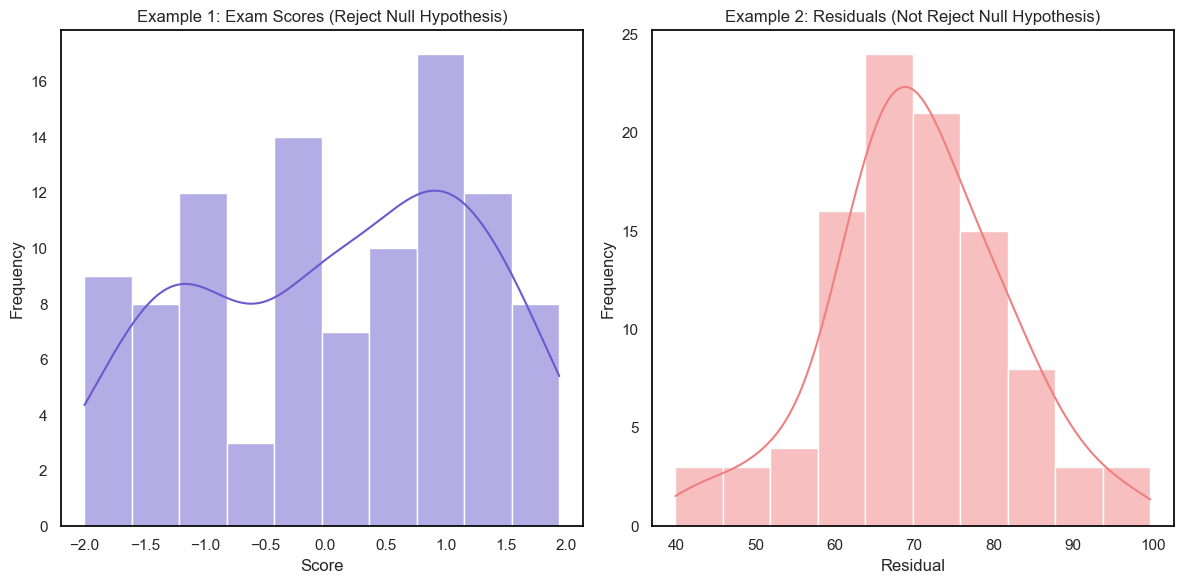

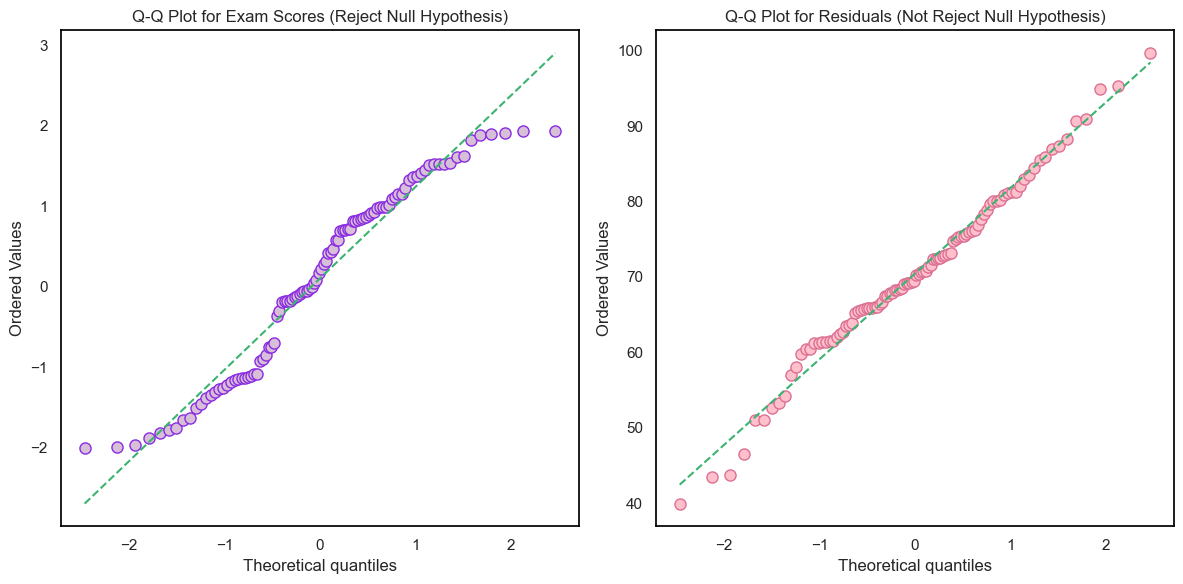

Example 1: Exam Scores (Reject Null Hypothesis)
Test Statistic: 0.9464650750160217, p-value: 0.000488894758746028
The data does not follow a normal distribution.

Example 2: Residuals (Not Reject Null Hypothesis)
Test Statistic: 0.9885090589523315, p-value: 0.5464649200439453
The data follows a normal distribution.


In [119]:
from scipy.stats import shapiro
import scipy.stats as stats

# Example 1: Testing Exam Scores for Normal Distribution (not reject null hypothesis)
exam_scores = np.random.uniform(low=-2, high=2, size=100)

# Example 2: Checking Residuals for Normality in Linear Regression (reject null hypothesis)
residuals = np.random.normal(loc=70, scale=10, size=100)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data for Example 1
sns.histplot(exam_scores, kde=True, color='slateblue', ax=axes[0], bins=10)
axes[0].set_title('Example 1: Exam Scores (Reject Null Hypothesis)')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(False)

# Plot data for Example 2
sns.histplot(residuals, kde=True, color='lightcoral', ax=axes[1], bins=10)
axes[1].set_title('Example 2: Residuals (Not Reject Null Hypothesis)')
axes[1].set_xlabel('Residual')
axes[1].set_ylabel('Frequency')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Create Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for Example 1
stats.probplot(exam_scores, dist="norm", plot=axes[0])
axes[0].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[0].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[0].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[0].get_lines()[0].set_markerfacecolor('thistle')  # Set face color of the markers
axes[0].get_lines()[0].set_markeredgecolor('blueviolet')  # Set edge color of the markers

axes[0].set_title('Q-Q Plot for Exam Scores (Reject Null Hypothesis)')
axes[0].grid(False)

# Q-Q plot for Example 2
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[1].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[1].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[1].get_lines()[0].set_markerfacecolor('pink')  # Set face color of the markers
axes[1].get_lines()[0].set_markeredgecolor('palevioletred')  # Set edge color of the markers

axes[1].set_title('Q-Q Plot for Residuals (Not Reject Null Hypothesis)')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk Test and print results
stat1, p_value1 = shapiro(exam_scores)
stat2, p_value2 = shapiro(residuals)

print("Example 1: Exam Scores (Reject Null Hypothesis)")
print(f"Test Statistic: {stat1}, p-value: {p_value1}")
if p_value1 < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

print("\nExample 2: Residuals (Not Reject Null Hypothesis)")
print(f"Test Statistic: {stat2}, p-value: {p_value2}")
if p_value2 < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

### <font color='blueviolet'> D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

**Purpose:**

Determines whether a dataset follows a Gaussian (normal) distribution.

**Assumptions:**

Observations in each sample are independent and identically distributed (iid).

**Interpretation:**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

**Examples:**

<font color='royalblue'> **Example 1:**

Testing Exam Scores for Normal Distribution

Scenario: Analyzing the distribution of exam scores from a class of 100 students.

<font color='royalblue'> **Example 2:**

Checking Residuals for Normality in Linear Regression

Scenario: Evaluating residuals from a linear regression model.

**Python Code:**

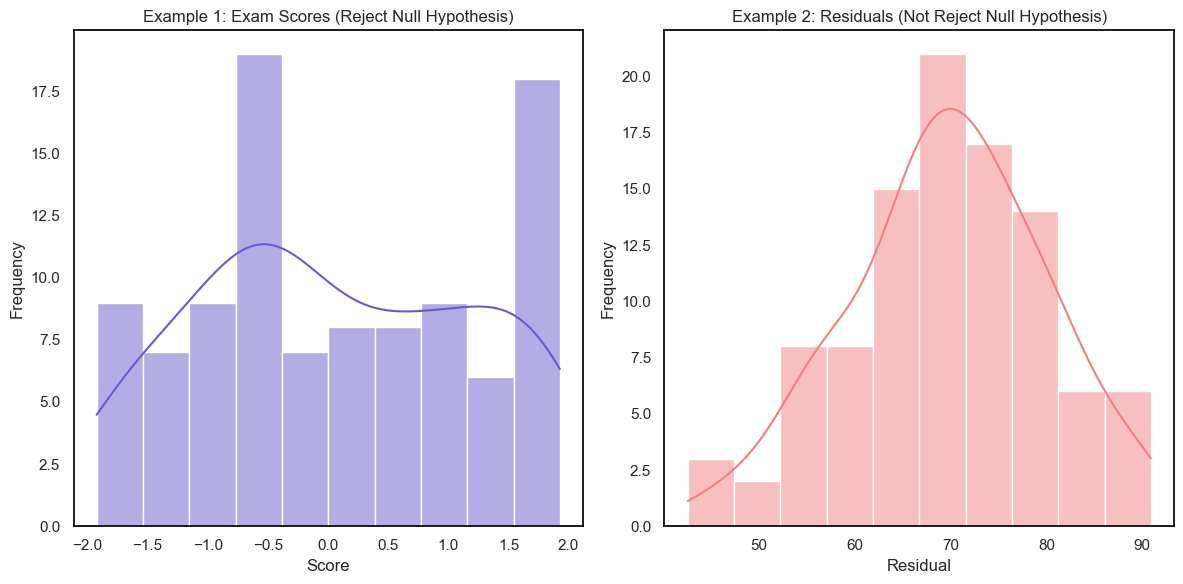

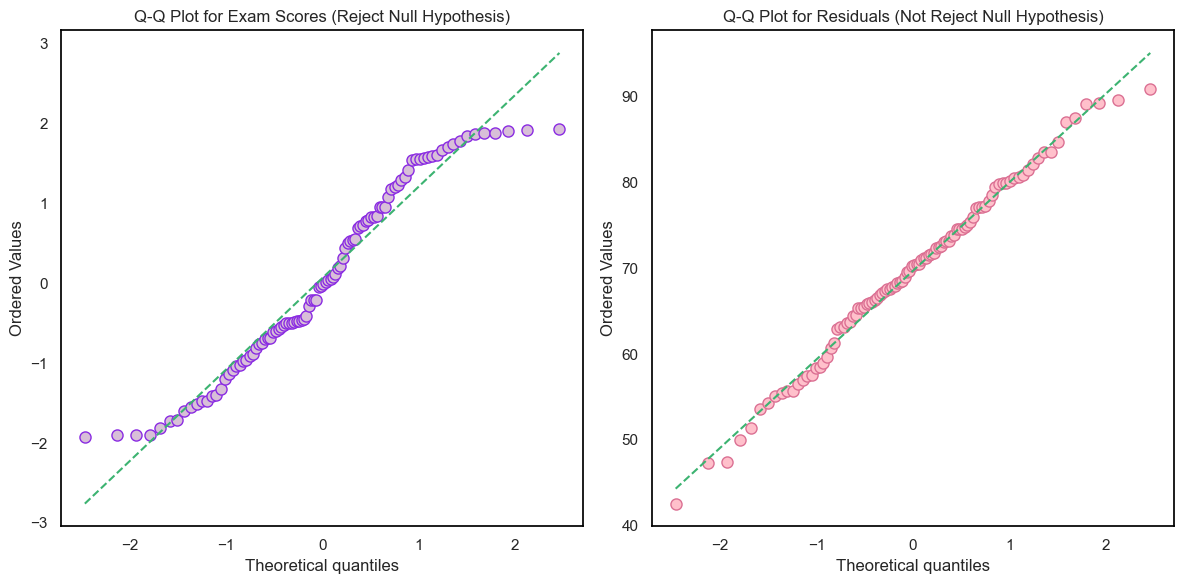

Example 1: Exam Scores (Reject Null Hypothesis)
Test Statistic: 28.200537225599508, p-value: 7.52196222544144e-07
The data does not follow a normal distribution.

Example 2: Residuals (Not Reject Null Hypothesis)
Test Statistic: 0.8003658636417056, p-value: 0.6701974343841921
The data follows a normal distribution.


In [120]:
from scipy.stats import normaltest

# Example 1: Testing Exam Scores for Normal Distribution (not reject null hypothesis)
exam_scores = np.random.uniform(low=-2, high=2, size=100)

# Example 2: Checking Residuals for Normality in Linear Regression (reject null hypothesis)
residuals = np.random.normal(loc=70, scale=10, size=100)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot data for Example 1
sns.histplot(exam_scores, kde=True, color='slateblue', ax=axes[0], bins=10)
axes[0].set_title('Example 1: Exam Scores (Reject Null Hypothesis)')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(False)

# Plot data for Example 2
sns.histplot(residuals, kde=True, color='lightcoral', ax=axes[1], bins=10)
axes[1].set_title('Example 2: Residuals (Not Reject Null Hypothesis)')
axes[1].set_xlabel('Residual')
axes[1].set_ylabel('Frequency')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Create Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for Example 1
stats.probplot(exam_scores, dist="norm", plot=axes[0])
axes[0].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[0].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[0].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[0].get_lines()[0].set_markerfacecolor('thistle')  # Set face color of the markers
axes[0].get_lines()[0].set_markeredgecolor('blueviolet')  # Set edge color of the markers

axes[0].set_title('Q-Q Plot for Exam Scores (Reject Null Hypothesis)')
axes[0].grid(False)

# Q-Q plot for Example 2
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[1].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[1].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[1].get_lines()[0].set_markerfacecolor('pink')  # Set face color of the markers
axes[1].get_lines()[0].set_markeredgecolor('palevioletred')  # Set edge color of the markers

axes[1].set_title('Q-Q Plot for Residuals (Not Reject Null Hypothesis)')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk Test and print results
stat1, p_value1 = normaltest(exam_scores)
stat2, p_value2 = normaltest(residuals)

print("Example 1: Exam Scores (Reject Null Hypothesis)")
print(f"Test Statistic: {stat1}, p-value: {p_value1}")
if p_value1 < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

print("\nExample 2: Residuals (Not Reject Null Hypothesis)")
print(f"Test Statistic: {stat2}, p-value: {p_value2}")
if p_value2 < 0.05:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

### <font color='blueviolet'> Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

**Purpose:**

Determines whether a dataset follows a Gaussian (normal) distribution.

**Assumptions:**

Observations in each sample are independent and identically distributed (iid).

**Interpretation:**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

**Examples:**

<font color='royalblue'> **Example 1:**

Assessing Data Distribution in a Manufacturing Process

Scenario: Analyzing quality control data from a manufacturing process.


<font color='royalblue'> **Example 2:**

Evaluating Distribution of Body Mass Index (BMI) Data

Scenario: Examining BMI measurements from a population sample.


<font color='lightseagreen'> **For the normal distribution data, the test statistic is smaller than the critical values, indicating a likely Gaussian distribution.**

<font color='lightseagreen'> **For the not normal distribution data, the test statistic is greater than the critical values, indicating a likely non-Gaussian distribution.**


**Python Code:**

Example 1: Manufacturing Process (Reject Null Hypothesis)
Statistic: 1.455593992600697
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not follow a normal distribution.

Example 2: BMI Data (Not Reject Null Hypothesis)
Statistic: 0.29251593426747036
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]
The data follows a normal distribution.


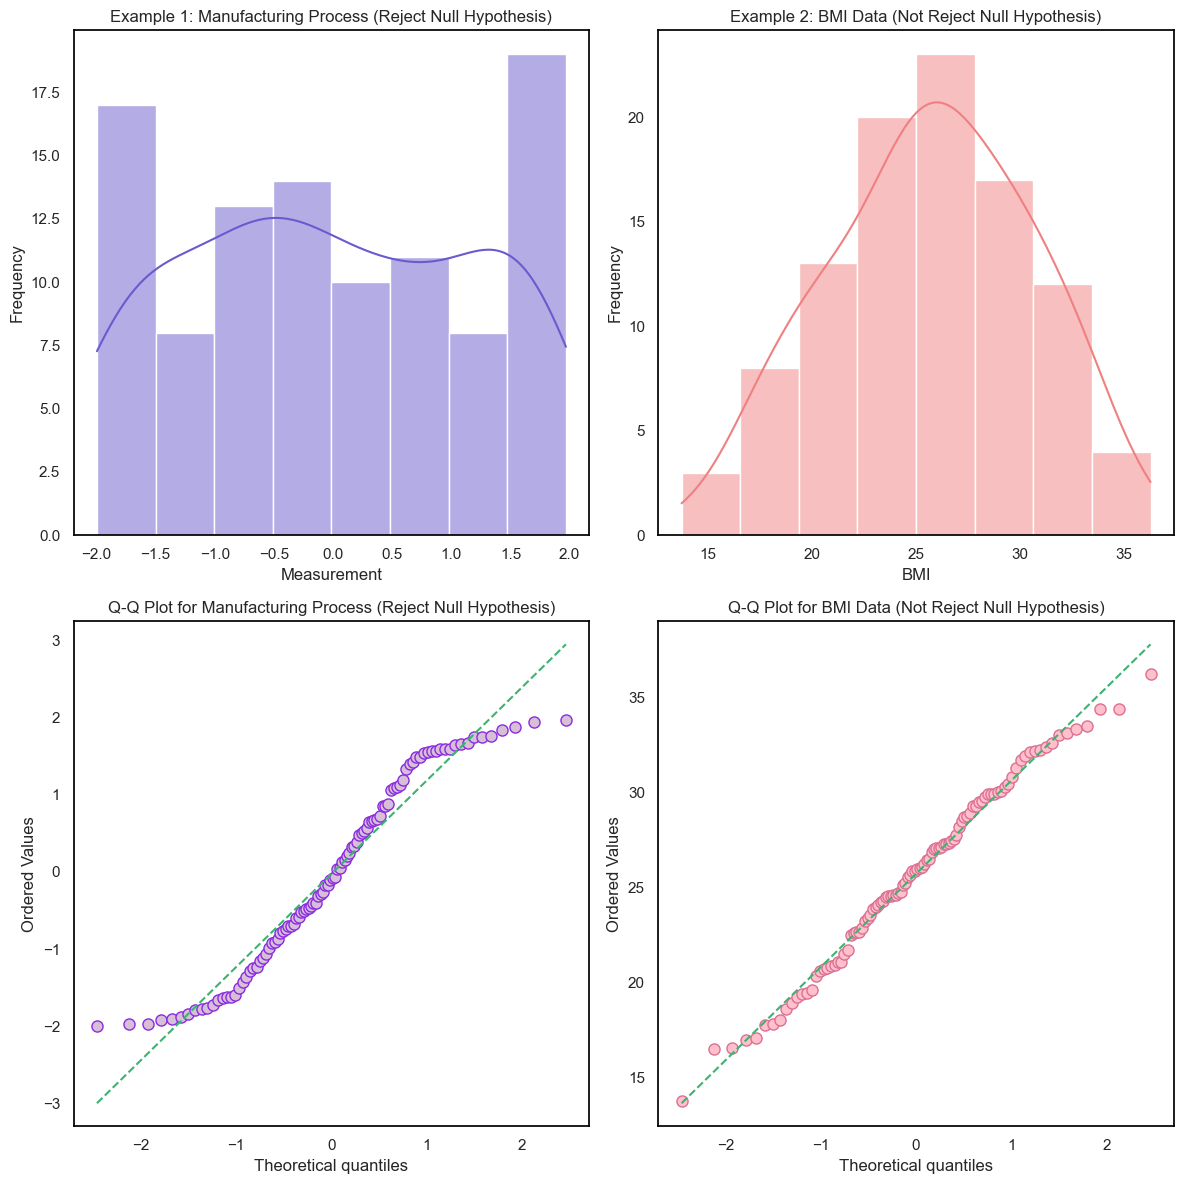

In [121]:
from scipy.stats import anderson
import scipy.stats as stats

# Example 1: Assessing Data Distribution in a Manufacturing Process (reject null hypothesis)
manufacturing_data = np.random.uniform(low=-2, high=2, size=100)  

# Example 2: Evaluating Distribution of Body Mass Index (BMI) Data (not reject null hypothesis)
bmi_data = np.random.normal(loc=25, scale=5, size=100)

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot data for Example 1
sns.histplot(manufacturing_data, kde=True, color='slateblue', ax=axes[0, 0])
axes[0, 0].set_title('Example 1: Manufacturing Process (Reject Null Hypothesis)')
axes[0, 0].set_xlabel('Measurement')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(False)  # Remove grid

# Plot data for Example 2
sns.histplot(bmi_data, kde=True, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Example 2: BMI Data (Not Reject Null Hypothesis)')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(False)  # Remove grid

# Perform Anderson-Darling Test and print results
result1 = anderson(manufacturing_data)
result2 = anderson(bmi_data)

print("Example 1: Manufacturing Process (Reject Null Hypothesis)")
print(f"Statistic: {result1.statistic}")
print(f"Critical Values: {result1.critical_values}")
print(f"Significance Levels: {result1.significance_level}")
if result1.statistic > result1.critical_values[2]:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

print("\nExample 2: BMI Data (Not Reject Null Hypothesis)")
print(f"Statistic: {result2.statistic}")
print(f"Critical Values: {result2.critical_values}")
print(f"Significance Levels: {result2.significance_level}")
if result2.statistic > result2.critical_values[2]:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

# Q-Q plot for Example 1
stats.probplot(manufacturing_data, dist="norm", plot=axes[1, 0])
axes[1, 0].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[1, 0].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[1, 0].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[1, 0].get_lines()[0].set_markerfacecolor('thistle')  # Set face color of the markers
axes[1, 0].get_lines()[0].set_markeredgecolor('blueviolet')  # Set edge color of the markers
axes[1, 0].set_title('Q-Q Plot for Manufacturing Process (Reject Null Hypothesis)')
axes[1, 0].grid(False)  # Remove grid

# Q-Q plot for Example 2
stats.probplot(bmi_data, dist="norm", plot=axes[1, 1])
axes[1, 1].get_lines()[1].set_color('mediumseagreen')  # Set color of the line
axes[1, 1].get_lines()[1].set_linestyle('dashed')  # Set linestyle of the line
axes[1, 1].get_lines()[0].set_markersize(8)  # Set size of the markers
axes[1, 1].get_lines()[0].set_markerfacecolor('pink')  # Set face color of the markers
axes[1, 1].get_lines()[0].set_markeredgecolor('palevioletred')  # Set edge color of the markers
axes[1, 1].set_title('Q-Q Plot for BMI Data (Not Reject Null Hypothesis)')
axes[1, 1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()

### <font color='blueviolet'> Comparison of Normality Tests:

<font color='mediumvioletred'> **Shapiro-Wilk Test:**

**Advantages:**
Suitable for small sample sizes, sensitive to departures from normality in the tails of the distribution.

**Disadvantages:** 
Less powerful for large sample sizes, less accurate for heavily skewed distributions.

**Sensitivity:**
High sensitivity to deviations from normality in the tails.

**Ease of Interpretation:**

Straightforward interpretation based on p-values.

**Common Usage:**
Widely used due to its balance of sensitivity and simplicity.

<font color='mediumvioletred'> **D’Agostino’s K^2 Test:**

**Advantages:**
Provides a combined test for skewness and kurtosis.

**Disadvantages:**
Less suitable for small sample sizes, may be less powerful for detecting deviations in the tails.

**Sensitivity:**
Comprehensive assessment including skewness and kurtosis.

**Ease of Interpretation:**
Straightforward interpretation based on p-values.

**Common Usage:** 
Commonly used, especially when assessing skewness and kurtosis.

<font color='mediumvioletred'> **Anderson-Darling Test:**

**Advantages:** 
Provides critical values for different significance levels, aiding interpretation.

**Disadvantages:**
Less commonly used, critical values may not be readily available for all sample sizes.

**Sensitivity:** 
Provides a comprehensive assessment of normality.

**Ease of Interpretation:** 
Requires comparison with critical values.

**Common Usage:** 
Less common but offers additional flexibility with significance levels.

<font color='mediumvioletred'> **Overall Comparison:**

**Power:**
Shapiro-Wilk is preferred for small sample sizes, while D’Agostino’s K^2 Test and Anderson-Darling Test may perform better for larger sample sizes.

**Sensitivity:** 
Shapiro-Wilk is sensitive to deviations in the tails, while D’Agostino’s K^2 Test and Anderson-Darling Test provide a broader assessment.
Ease of Interpretation: Shapiro-Wilk and D’Agostino’s K^2 Test offer straightforward interpretations, while Anderson-Darling Test requires critical value comparison.

**Common Usage:** Shapiro-Wilk is the most commonly used due to its balance of sensitivity and simplicity, followed by D’Agostino’s K^2 Test. Anderson-Darling Test is less common but offers additional flexibility.

<font color='mediumvioletred'> **Summary:**

The Shapiro-Wilk Test is widely used for its balance of sensitivity and simplicity, especially for small sample sizes. D’Agostino’s K^2 Test offers a comprehensive assessment of skewness and kurtosis but may be less powerful for small sample sizes. Anderson-Darling Test provides critical values for different significance levels but is less commonly used compared to the other tests. Overall, the choice of test depends on factors such as sample size, distribution characteristics, and the need for flexibility in interpretation.

## <font color='crimson'> 2. Correlation Tests
<font color='mediumblue'> **This section lists statistical tests that you can use to check if two samples are related.**

### <font color='blueviolet'> Pearson’s Correlation Coefficient

**Purpose:**
Tests whether two samples have a linear relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
  
**Interpretation**

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

**Examples:**

<font color='royalblue'> **Example 1:**

Assessing Correlation Between Study Hours and Exam Scores

Scenario: Analyzing study hours and exam scores of 50 students.

<font color='royalblue'> **Example 2:**

Examining Correlation Between Temperature and Ice Cream Sales

Scenario: Analyzing temperature and daily ice cream sales data.



**Python Code:**

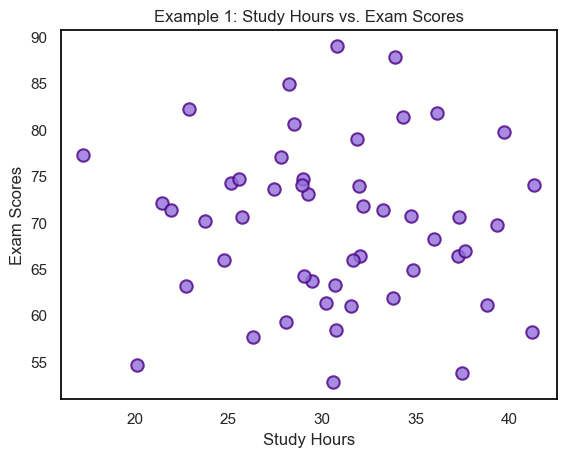

Pearson correlation coefficient (Example 1): -0.059
p-value: 0.683
Null hypothesis not rejected (Probably independent)


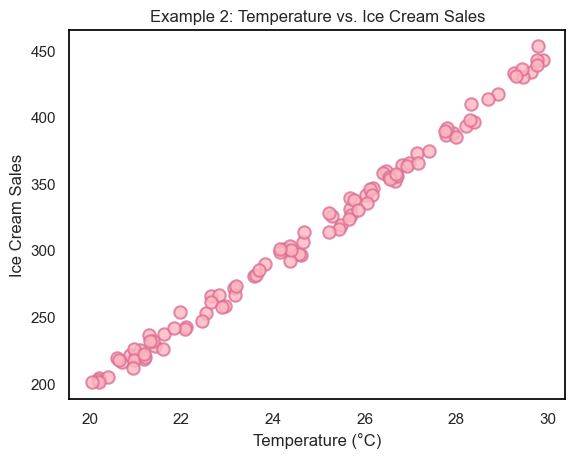

Pearson correlation coefficient (Example 2): 0.997
p-value: 0.000
Null hypothesis rejected (Probably dependent)


In [122]:
from scipy.stats import pearsonr

# Generate sample data for independent samples (Example 1)
np.random.seed(0)
independent_data = pd.DataFrame({
    'Study Hours': np.random.normal(30, 5, 50),
    'Exam Scores': np.random.normal(70, 10, 50)
})

# Calculate Pearson's correlation coefficient and p-value for independent samples
stat_ind, p_ind = pearsonr(independent_data['Study Hours'], independent_data['Exam Scores'])

# Plotting independent samples (Example 1) using Seaborn
sns.scatterplot(data=independent_data, x='Study Hours', y='Exam Scores', alpha=0.8, linewidth=1.5, s=80, color='mediumpurple', edgecolor='indigo')
plt.title('Example 1: Study Hours vs. Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for independent samples
print('Pearson correlation coefficient (Example 1): %.3f' % stat_ind)
print('p-value: %.3f' % p_ind)
if p_ind < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

# Generate sample data for dependent samples with a non-linear relationship (Example 2)
np.random.seed(0)
temperature = np.random.uniform(20, 30, 100)
ice_cream_sales = 0.5 * temperature**2 + np.random.normal(0, 5, 100)

dependent_data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Ice Cream Sales': ice_cream_sales
})

# Calculate Pearson's correlation coefficient and p-value for dependent samples (Example 2)
stat_dep, p_dep = pearsonr(dependent_data['Temperature (°C)'], dependent_data['Ice Cream Sales'])

# Plotting dependent samples (Example 2) using Seaborn
sns.scatterplot(data=dependent_data, x='Temperature (°C)', y='Ice Cream Sales', alpha=0.8, linewidth=1.5, s=80, color='lightpink', edgecolor='palevioletred')
plt.title('Example 2: Temperature vs. Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for dependent samples
print('Pearson correlation coefficient (Example 2): %.3f' % stat_dep)
print('p-value: %.3f' % p_dep)
if p_dep < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

### <font color='blueviolet'>Spearman’s Rank Correlation

**Purpose**

Tests whether two samples have a monotonic relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
  
**Interpretation**

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

**Examples:**

<font color='royalblue'> **Example 1:** 

Assessing Association Between Age and Income Rank

Scenario: Analyzing age and income rank of individuals in a survey.

<font color='royalblue'> **Example 2:** 

Investigating Correlation Between Customer Satisfaction and Product Ratings

Scenario: Examining customer satisfaction ratings and product feature ratings.

**Python Code:**

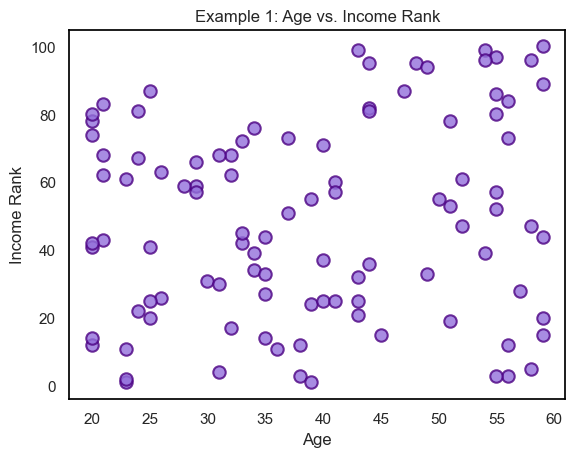

Spearman correlation coefficient (Example 1): 0.123
p-value: 0.224
Null hypothesis not rejected (Probably independent)


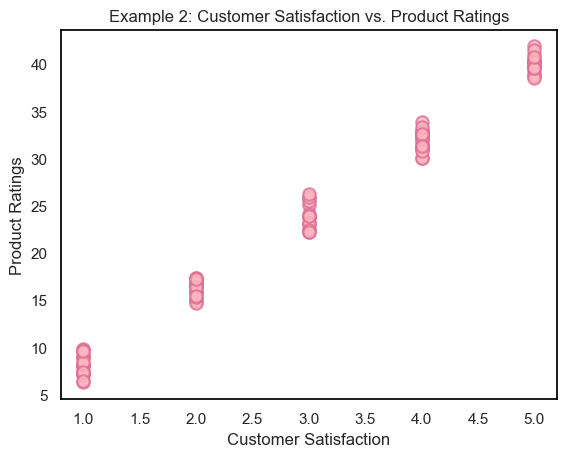

Spearman correlation coefficient (Example 2): 0.979
p-value: 0.000
Null hypothesis rejected (Probably dependent)


In [123]:
from scipy.stats import spearmanr

# Generate sample data for Example 1
np.random.seed(0)
age = np.random.randint(20, 60, 100)
income_rank = np.random.randint(1, 101, 100)


example1_data = pd.DataFrame({
    'Age': age,
    'Income Rank': income_rank
})

# Calculate Spearman's rank correlation coefficient and p-value for Example 1
rho1, p1 = spearmanr(example1_data['Age'], example1_data['Income Rank'])

# Plotting Example 1 using Seaborn
sns.scatterplot(data=example1_data, x='Age', y='Income Rank', alpha=0.8, linewidth=1.5, s=80, color='mediumpurple', edgecolor='indigo')
plt.title('Example 1: Age vs. Income Rank')
plt.xlabel('Age')
plt.ylabel('Income Rank')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for Example 1
print('Spearman correlation coefficient (Example 1): %.3f' % rho1)
print('p-value: %.3f' % p1)
if p1 < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

# Generate sample data for Example 2
np.random.seed(0)
customer_satisfaction = np.random.randint(1, 6, 100)
product_ratings = 8 * customer_satisfaction + np.random.normal(0, 1, 100)

example2_data = pd.DataFrame({
    'Customer Satisfaction': customer_satisfaction,
    'Product Ratings': product_ratings
})

# Calculate Spearman's rank correlation coefficient and p-value for Example 2
rho2, p2 = spearmanr(example2_data['Customer Satisfaction'], example2_data['Product Ratings'])

# Plotting Example 2 using Seaborn
sns.scatterplot(data=example2_data, x='Customer Satisfaction', y='Product Ratings', alpha=0.8, linewidth=1.5, s=80, color='lightpink', edgecolor='palevioletred')
plt.title('Example 2: Customer Satisfaction vs. Product Ratings')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Product Ratings')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for Example 2
print('Spearman correlation coefficient (Example 2): %.3f' % rho2)
print('p-value: %.3f' % p2)
if p2 < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

### <font color='blueviolet'> Kendall’s Rank Correlation

**Purpose**

Tests whether two samples have a monotonic relationship.

**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
  
**Interpretation**

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

**Examples:**

<font color='royalblue'> **Example 1:** 

Assessing Association Between Exam Scores and Study Time

Scenario: Analyzing the correlation between exam scores and study time of students.

<font color='royalblue'> **Example 2:** 

Investigating Correlation Between Employee Tenure and Performance Rankings

Scenario: Examining the relationship between employee tenure and performance rankings.

**Python Code:**

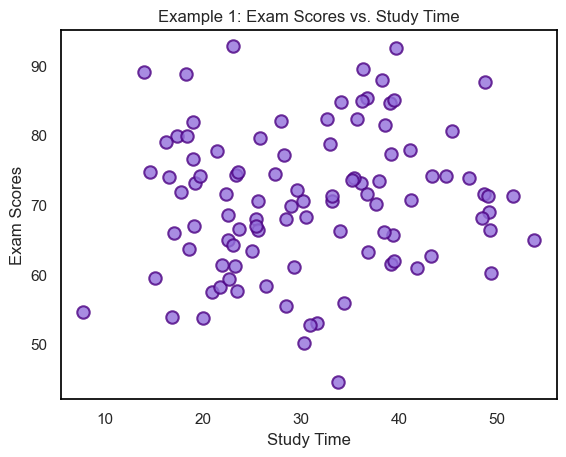

Kendall correlation coefficient (Example 1): 0.061
p-value: 0.365
Null hypothesis not rejected (Probably independent)


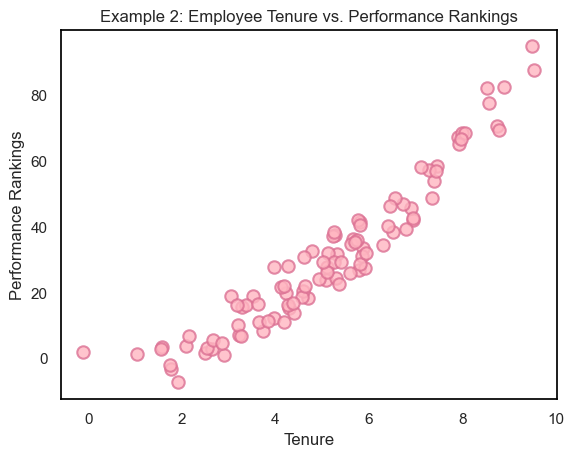

Kendall correlation coefficient (Example 2): 0.831
p-value: 0.000
Null hypothesis rejected (Probably dependent)


In [124]:
from scipy.stats import kendalltau

# Example 1: Assessing Association Between Exam Scores and Study Time
np.random.seed(0)
exam_scores = np.random.normal(loc=70, scale=10, size=100)
study_time = np.random.normal(loc=30, scale=10, size=100)

# Calculate Kendall's rank correlation coefficient and p-value for Example 1
corr_coefficient_1, p_value_1 = kendalltau(exam_scores, study_time)

# Plotting Example 1 using Seaborn
sns.scatterplot(x=study_time, y=exam_scores, alpha=0.8,  color='mediumpurple',  edgecolor='indigo' , linewidth=1.5, s=80)
plt.title('Example 1: Exam Scores vs. Study Time')
plt.xlabel('Study Time')
plt.ylabel('Exam Scores')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for Example 1
print('Kendall correlation coefficient (Example 1): %.3f' % corr_coefficient_1)
print('p-value: %.3f' % p_value_1)
if p_value_1 < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

# Example 2: Investigating Correlation Between Employee Tenure and Performance Rankings
np.random.seed(0)
tenure = np.random.normal(loc=5, scale=2, size=100) 
performance_rankings = tenure**2 + 5 * np.random.normal(0, 1, 100)  # Using tenure^2 plus noise

# Calculate Kendall's rank correlation coefficient and p-value for Example 2
corr_coefficient_2, p_value_2 = kendalltau(tenure, performance_rankings)

# Plotting Example 2 using Seaborn
sns.scatterplot(x=tenure, y=performance_rankings, alpha=0.8,  color='lightpink',  edgecolor='palevioletred' , linewidth=1.5, s=80)
plt.title('Example 2: Employee Tenure vs. Performance Rankings')
plt.xlabel('Tenure')
plt.ylabel('Performance Rankings')
plt.grid(False)  # Remove grid
plt.show()

# Output the results for Example 2
print('Kendall correlation coefficient (Example 2): %.3f' % corr_coefficient_2)
print('p-value: %.3f' % p_value_2)
if p_value_2 < 0.05:
    print('Null hypothesis rejected (Probably dependent)')
else:
    print('Null hypothesis not rejected (Probably independent)')

### <font color='blueviolet'> Chi-Squared Test

**Purpose**

Tests whether two categorical variables are related or independent.

**Assumptions**

* Observations used in the calculation of the contingency table are independent.
* 25 or more examples in each cell of the contingency table.
  
**Interpretation**

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

**Examples:**

<font color='royalblue'> **Example 1:** 

Assessing Association Between Gender and Voting Preference

Scenario: Analyzing the relationship between gender and voting preference in a survey.

<font color='royalblue'> **Example 2:** 

Investigating Correlation Between Education Level and Employment Status

Scenario: Examining the relationship between education level and employment status among survey respondents.

**Python Code:**

Dataset 1 - Chi-Squared: 41.66306441634089
Dataset 1 - p-value: 4.73007905032084e-09
Dataset 1:  Null hypothesis rejected (Probably dependent)
Dataset 2 - Chi-Squared: 3.655289276204308
Dataset 2 - p-value: 0.3011730406266159
Dataset 2: Null hypothesis not rejected (Probably independent)


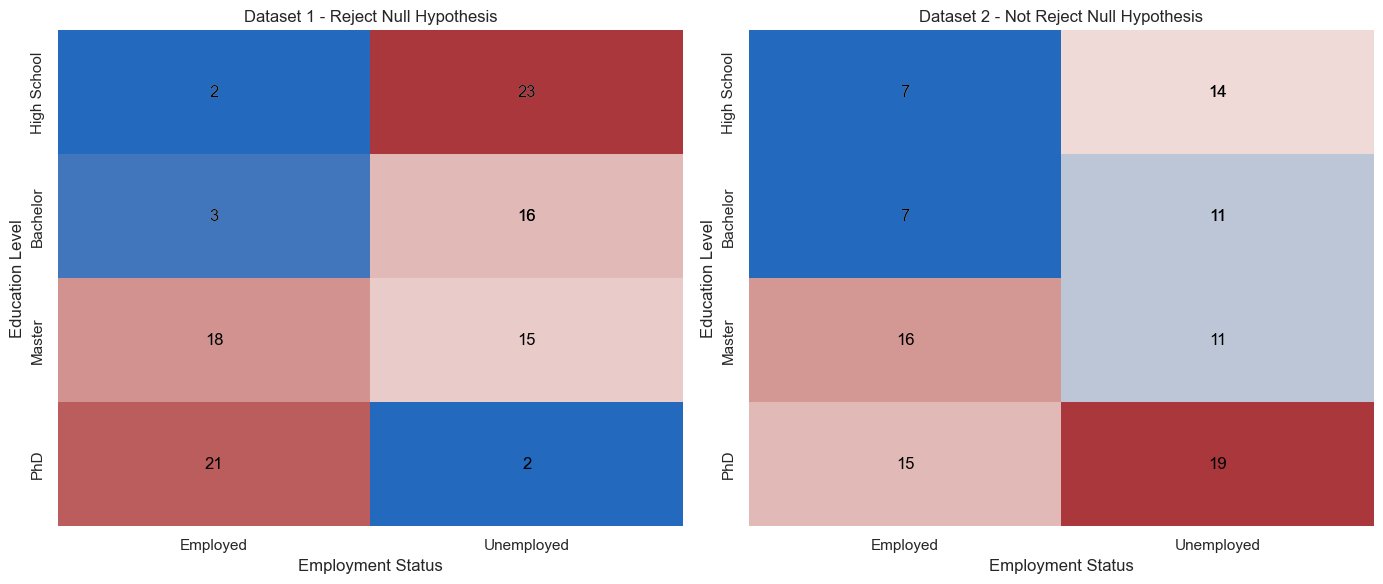

In [125]:
from scipy.stats import chi2_contingency

# Set random seed for reproducibility
np.random.seed(42)

# Education levels
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']

# Employment statuses
employment_statuses = ['Employed', 'Unemployed']

probabilities = {
    'Employed': [0.05, 0.10, 0.5, 0.9],  # Higher probabilities for higher education levels
    'Unemployed': [0.95, 0.90, 0.5, 0.1]  # Lower probabilities for higher education levels
}

# Normalize probabilities to ensure they sum up to 1
for status in employment_statuses:
    probabilities[status] = np.array(probabilities[status]) / np.sum(probabilities[status])

# Dataset 1 (Reject Null Hypothesis)
data1 = pd.DataFrame(np.random.choice(employment_statuses, size=(100,)),
                     columns=['Employment Status'])
# Generate education levels based on employment status
data1['Education Level'] = [np.random.choice(education_levels, p=probabilities[status]) for status in data1['Employment Status']]

# Dataset 2 (Not Reject Null Hypothesis)
data2 = pd.DataFrame({
    'Education Level': np.random.choice(education_levels, size=100),
    'Employment Status': np.random.choice(employment_statuses, size=100)
})

# Perform Chi-Squared test
def perform_chi_squared_test(data):
    # Create a contingency table
    contingency_table = pd.crosstab(data['Education Level'], data['Employment Status'], 
                                    rownames=['Education Level'], colnames=['Employment Status'],
                                    dropna=False, normalize=False)
    
    # Reorder the index
    contingency_table = contingency_table.reindex(index=education_levels)
    
    # Perform Chi-Squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    return chi2, p

# Perform Chi-Squared test on dataset 1
chi2_1, p_1 = perform_chi_squared_test(data1)
print("Dataset 1 - Chi-Squared:", chi2_1)
print("Dataset 1 - p-value:", p_1)
if p_1 > 0.05:
    print('Dataset 1: Null hypothesis not rejected (Probably independent)')
else:
    print('Dataset 1:  Null hypothesis rejected (Probably dependent)')

# Perform Chi-Squared test on dataset 2
chi2_2, p_2 = perform_chi_squared_test(data2)
print("Dataset 2 - Chi-Squared:", chi2_2)
print("Dataset 2 - p-value:", p_2)
if p_2 > 0.05:
    print('Dataset 2: Null hypothesis not rejected (Probably independent)')
else:
    print('Dataset 2: Null hypothesis rejected (Probably dependent)')

# Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
contingency_table1 = pd.crosstab(data1['Education Level'], data1['Employment Status'], 
                                 rownames=['Education Level'], colnames=['Employment Status'],
                                 dropna=False, normalize=False)
contingency_table1 = contingency_table1.reindex(index=education_levels)
sns.heatmap(contingency_table1, annot=True, cmap="vlag", cbar=False, fmt='d')
for i in range(len(contingency_table1.index)):
    for j in range(len(contingency_table1.columns)):
        plt.text(j + 0.5, i + 0.5, contingency_table1.iloc[i, j], ha='center', va='center', color='black')
plt.title("Dataset 1 - Reject Null Hypothesis")
plt.xlabel("Employment Status")
plt.ylabel("Education Level")

plt.subplot(1, 2, 2)
contingency_table2 = pd.crosstab(data2['Education Level'], data2['Employment Status'], 
                                 rownames=['Education Level'], colnames=['Employment Status'],
                                 dropna=False, normalize=False)
contingency_table2 = contingency_table2.reindex(index=education_levels)
sns.heatmap(contingency_table2, annot=True, cmap="vlag", cbar=False, fmt='d')
for i in range(len(contingency_table2.index)):
    for j in range(len(contingency_table2.columns)):
        plt.text(j + 0.5, i + 0.5, contingency_table2.iloc[i, j], ha='center', va='center', color='black')
plt.title("Dataset 2 - Not Reject Null Hypothesis")
plt.xlabel("Employment Status")
plt.ylabel("Education Level")

plt.tight_layout()
plt.show()

### <font color='blueviolet'> Comparison of Correlation Tests:

<font color='mediumvioletred'> **1. Pearson’s Correlation Coefficient:**

**Advantages:**

Measures linear relationships between variables.
Widely used and well-understood.
Provides a quantitative measure of the strength and direction of the relationship.
Easily interpretable.

**Disadvantages:**

Assumes that the relationship between variables is linear.
Sensitive to outliers.

**Power:**

High power to detect linear relationships.

**Sensitivity:**

Sensitive to deviations from linearity and outliers.

**Ease of Interpretation:**

Easy to interpret, as the correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

**Common Usage:**

Widely used in various fields such as statistics, economics, psychology, and social sciences.

<font color='mediumvioletred'> **2. Spearman’s Rank Correlation:**

**Advantages:**

Does not assume a linear relationship.
Robust to outliers.
Applicable to non-normally distributed data.

**Disadvantages:**

Less powerful than Pearson’s correlation for detecting linear relationships.
Ignores the magnitude of differences between variables.

**Power:**

Moderate power for detecting monotonic relationships.

**Sensitivity:**

Less sensitive to outliers and deviations from linearity compared to Pearson’s correlation.

**Ease of Interpretation:**

The coefficient ranges from -1 to 1, similar to Pearson’s correlation. However, interpretation is focused on the direction of the relationship rather than the strength of the linear relationship.

**Common Usage:**

Commonly used when data violate the assumptions of Pearson’s correlation, such as when dealing with ordinal data or skewed distributions.

<font color='mediumvioletred'> **3. Kendall’s Rank Correlation:**

**Advantages:**

Measures the strength of association between variables without assuming linearity.
Robust to outliers and non-normality.
Sensitive to ties in the data.

**Disadvantages:**

Less powerful than Pearson’s correlation for detecting linear relationships.
Computationally more intensive compared to Spearman’s correlation.

**Power:**

Similar to Spearman’s correlation, Kendall’s correlation has moderate power for detecting monotonic relationships.

**Sensitivity:**

Similar to Spearman’s correlation, Kendall’s correlation is less sensitive to outliers and deviations from linearity compared to Pearson’s correlation.

**Ease of Interpretation:**

The coefficient ranges from -1 to 1, where 1 indicates perfect concordance, -1 indicates perfect discordance, and 0 indicates no association.
Common Usage:

Often used in situations where data have tied ranks or when assessing associations between variables with ordinal scales.

<font color='mediumvioletred'> **4. Chi-Squared Test:**

**Advantages:**

Tests the association between categorical variables.
Easy to understand and implement.
Provides information about the strength and direction of association.

**Disadvantages:**

Assumes categorical data and independence of observations.
Requires a sufficiently large sample size in each category for accurate results.
May not provide information on the direction or magnitude of the relationship.

**Power:**

Moderate to high power depending on sample size and cell frequencies.

**Sensitivity:**

Sensitivity is affected by sample size and cell frequencies.

**Ease of Interpretation:**

The test statistic follows a chi-squared distribution, and the interpretation involves comparing the observed and expected frequencies to determine whether they are significantly different.

**Common Usage:**

Widely used in fields such as biology, social sciences, and market research to analyze categorical data and test for associations between variables.

<font color='mediumvioletred'> **Overall Comparison:**

**Power:**

Shapiro-Wilk is preferred for small sample sizes, while D’Agostino’s K^2 Test and Anderson-Darling Test may perform better for larger sample sizes.

**Sensitivity:**

Shapiro-Wilk is sensitive to deviations in the tails, while D’Agostino’s K^2 Test and Anderson-Darling Test provide a broader assessment.

**Ease of Interpretation:**

Shapiro-Wilk and D’Agostino’s K^2 Test offer straightforward interpretations, while Anderson-Darling Test requires critical value comparison.

**Common Usage:**

Shapiro-Wilk is the most commonly used due to its balance of sensitivity and simplicity, followed by D’Agostino’s K^2 Test. Anderson-Darling Test is less common but offers additional flexibility.

<font color='mediumvioletred'> **Summary:**

The Shapiro-Wilk Test is widely used for its balance of sensitivity and simplicity, especially for small sample sizes. D’Agostino’s K^2 Test offers a comprehensive assessment of skewness and kurtosis but may be less powerful for small sample sizes. Anderson-Darling Test provides critical values for different significance levels but is less commonly used compared to the other tests. Overall, the choice of test depends on factors such as sample size, distribution characteristics, and the need for flexibility in interpretation.

## <font color='crimson'> 3. Stationary Tests
<font color='mediumblue'> **This section lists statistical tests that you can use to check if a time series is stationary or not.**

### <font color='blueviolet'> Augmented Dickey-Fuller Unit Root Test

**Purpose**

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.


**Assumptions**

* Observations in are temporally ordered.
  
**Interpretation**

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

**Examples:**

<font color='royalblue'> **Example 1:** 

Checking Stationarity of Daily Stock Prices

Scenario: Analyzing daily closing prices of a stock.

<font color='royalblue'> **Example 2:** 

Assessing Stationarity of Quarterly GDP Data

Scenario: Examining quarterly GDP data of a country.

**Python Code:**

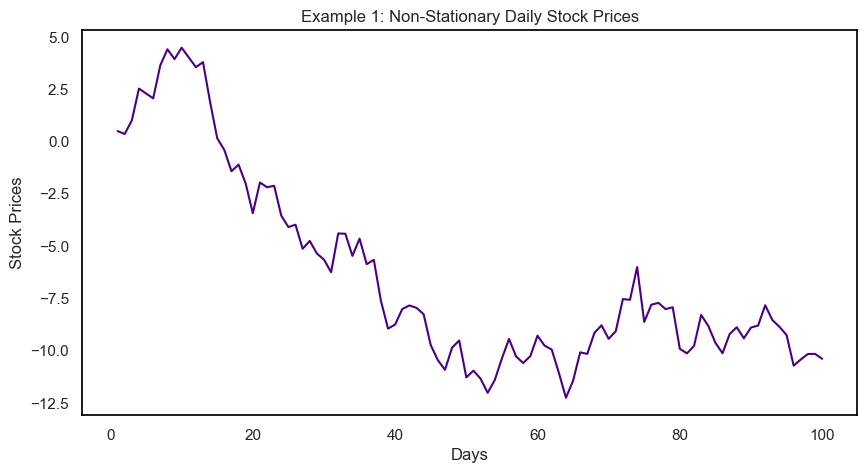

Example 1 - Augmented Dickey-Fuller Test:
ADF Statistic: -1.358
p-value: 0.602
Null hypothesis not rejected (Probably not stationary)


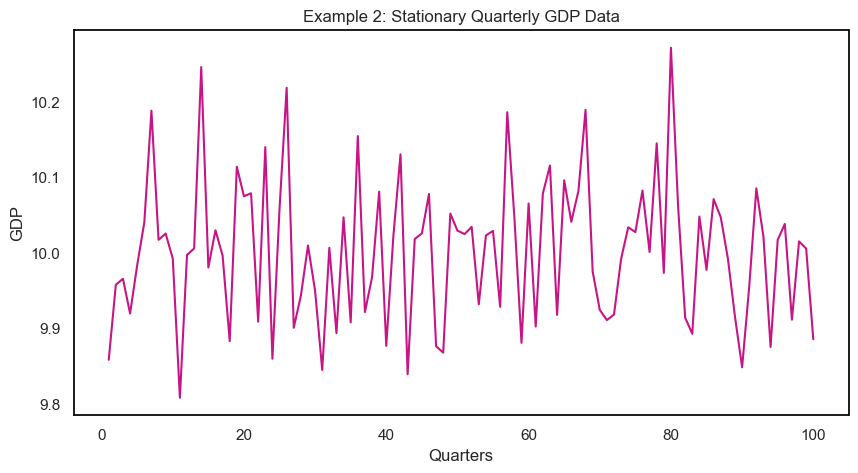


Example 2 - Augmented Dickey-Fuller Test:
ADF Statistic: -10.875
p-value: 0.000
Null hypothesis rejected (Probably stationary)


In [126]:
from statsmodels.tsa.stattools import adfuller

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  

# Example 1: Checking Stationarity of Daily Stock Prices
# Generate sample daily stock prices (non-stationary)
np.random.seed(42)
days = np.arange(1, 101)
stock_prices = np.cumsum(np.random.randn(100))

# Plot daily stock prices
plt.figure(figsize=(10, 5))
sns.lineplot(x=days, y=stock_prices, color='indigo')
plt.title('Example 1: Non-Stationary Daily Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.grid(False)
plt.show()

# Augmented Dickey-Fuller test
stat, p, _, _, _, _ = adfuller(stock_prices)
print('Example 1 - Augmented Dickey-Fuller Test:')
print('ADF Statistic: %.3f' % stat)
print('p-value: %.3f' % p)
if p > 0.05:
    print('Null hypothesis not rejected (Probably not stationary)')
else:
    print('Null hypothesis rejected (Probably stationary)')

# Example 2: Assessing Stationarity of Quarterly GDP Data
# Generate sample quarterly GDP data (stationary)
quarters = np.arange(1, 101)
gdp = np.random.normal(loc=0, scale=1, size=100) * 0.1 + 10

# Plot quarterly GDP data
plt.figure(figsize=(10, 5))
sns.lineplot(x=quarters, y=gdp, color='mediumvioletred')
plt.title('Example 2: Stationary Quarterly GDP Data')
plt.xlabel('Quarters')
plt.ylabel('GDP')
plt.grid(False)
plt.show()

# Augmented Dickey-Fuller test
stat, p, _, _, _, _ = adfuller(gdp)
print('\nExample 2 - Augmented Dickey-Fuller Test:')
print('ADF Statistic: %.3f' % stat)
print('p-value: %.3f' % p)
if p > 0.05:
    print('Null hypothesis not rejected (Probably not stationary)')
else:
    print('Null hypothesis rejected (Probably stationary)')

### <font color='blueviolet'> Kwiatkowski-Phillips-Schmidt-Shin

**Purpose**

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.


**Assumptions**

* Observations in are temporally ordered.
  
**Interpretation**

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

**Examples:**

<font color='royalblue'> **Example 1:** 

Checking Stationarity of Daily Stock Prices

Scenario: Analyzing daily closing prices of a stock.

<font color='royalblue'> **Example 2:** 

Assessing Stationarity of Quarterly GDP Data

Scenario: Examining quarterly GDP data of a country.

**Python Code:**

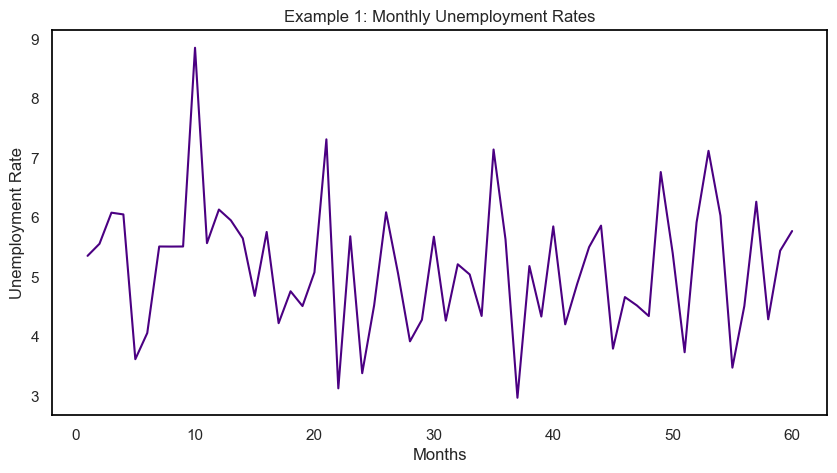

Example 1 - KPSS Test:
KPSS Statistic: 0.186
p-value: 0.100
Null hypothesis not rejected (Probably not stationary)


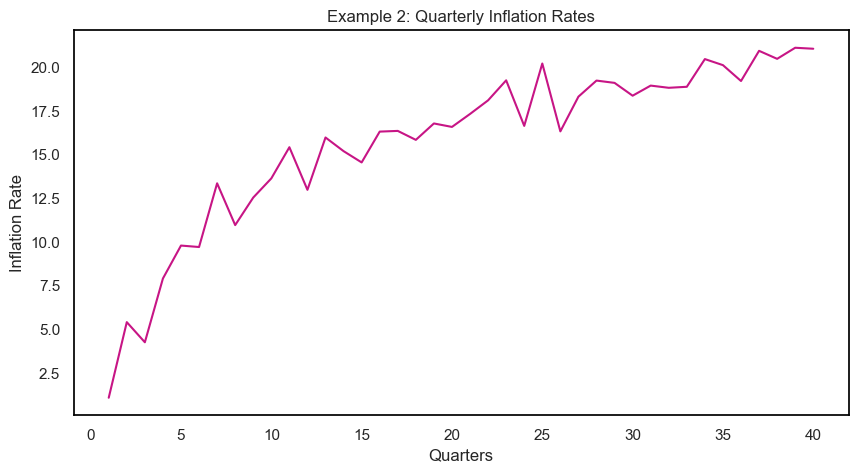


Example 2 - KPSS Test:
KPSS Statistic: 0.823
p-value: 0.010
Null hypothesis rejected (Probably stationary)


In [127]:
from statsmodels.tsa.stattools import kpss

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black

# Example 1: Examining Trend-Stationarity of Monthly Unemployment Rates
# Generate sample monthly unemployment rates data
months = np.arange(1, 61)  # 10 years of data
unemployment_rates = np.random.normal(loc=5, scale=1, size=60)

# Plot monthly unemployment rates
plt.figure(figsize=(10, 5))
sns.lineplot(x=months, y=unemployment_rates, color='indigo')
plt.title('Example 1: Monthly Unemployment Rates')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate')
plt.grid(False)
plt.show()

# KPSS test
kpss_stat_unemployment, p_val_unemployment, lags_unemployment, crit_unemployment = kpss(unemployment_rates)
print('Example 1 - KPSS Test:')
print('KPSS Statistic: %.3f' % kpss_stat_unemployment)
print('p-value: %.3f' % p_val_unemployment)
if p_val_unemployment > 0.05:
    print('Null hypothesis not rejected (Probably not stationary)')
else:
    print('Null hypothesis rejected (Probably stationary)')

# Example 2: Assessing Trend-Stationarity of Quarterly Inflation Rates
# Generate sample quarterly inflation rates data
quarters = np.arange(1, 41)  # 10 years of data
trend_component = np.log(quarters) * 5  # Trend component
inflation_rates = np.random.normal(loc=2, scale=1, size=40) + trend_component

# Plot quarterly inflation rates
plt.figure(figsize=(10, 5))
sns.lineplot(x=quarters, y=inflation_rates, color='mediumvioletred')
plt.title('Example 2: Quarterly Inflation Rates')
plt.xlabel('Quarters')
plt.ylabel('Inflation Rate')
plt.grid(False)
plt.show()

# KPSS test
kpss_stat_inflation, p_val_inflation, lags_inflation, crit_inflation = kpss(inflation_rates)
print('\nExample 2 - KPSS Test:')
print('KPSS Statistic: %.3f' % kpss_stat_inflation)
print('p-value: %.3f' % p_val_inflation)
if p_val_inflation > 0.05:
    print('Null hypothesis not rejected (Probably not stationary)')
else:
    print('Null hypothesis rejected (Probably stationary)')

### <font color='blueviolet'> Comparison of Stationary Tests:

<font color='mediumvioletred'> **Augmented Dickey-Fuller (ADF) Test:**

**Advantages:**

Widely used in econometrics and time series analysis.
Provides a formal statistical test for the presence of a unit root, indicating the presence of a trend.
Allows for the inclusion of lagged differences in the model, accommodating autoregressive processes.

**Disadvantages:**

Assumes that the residuals from the autoregressive model are normally distributed.
May have low power for small sample sizes.
Results can be sensitive to the choice of lag order.

**Power:**

Moderate power, especially for larger sample sizes or stronger trends.

**Sensitivity:**

Sensitive to the specification of the model and the choice of lag order.
Can be influenced by the presence of heteroscedasticity or non-normality in the data.

**Ease of Interpretation:**

The null hypothesis states that the series has a unit root (non-stationary). Rejecting the null indicates stationarity.
Interpretation of results can be straightforward, with critical values provided for different confidence levels.

**Common Usage:**

Commonly used in economics, finance, and other fields to test for stationarity in time series data.

<font color='mediumvioletred'> **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**

**Advantages:**

Specifically designed to test for trend-stationarity in time series data.
Complementary to the ADF test, as it focuses on a different aspect of stationarity.
Does not require the specification of a model and allows for trend detection directly.

**Disadvantages:**

Less commonly used compared to the ADF test.
Less sensitive to certain forms of non-stationarity, such as short-term deviations from trend.

**Power:**

Moderate power, especially for detecting long-term trends or level shifts.

**Sensitivity:**

Sensitive to the presence of a deterministic trend in the data.
Less sensitive to short-term fluctuations or cyclical patterns.
Ease of Interpretation:

Null hypothesis states that the series is trend-stationary. Rejecting the null indicates non-trend-stationarity.
Interpretation can be straightforward, with critical values provided for different confidence levels.

**Common Usage:**

Often used alongside the ADF test to provide a more comprehensive assessment of stationarity, particularly in econometrics and time series analysis.
In summary, both tests offer valuable insights into the stationarity properties of time series data, with the ADF test focusing on autoregressive processes and the presence of trends, while the KPSS test specifically targets trend-stationarity. The choice between them often depends on the specific characteristics of the data and the research question at hand.

<font color='mediumvioletred'> **Overall Comparison:**

**Power:**

ADF Test: Moderate power, especially for larger sample sizes or stronger trends.

KPSS Test: Moderate power, especially for detecting long-term trends or level shifts.

**Sensitivity:**

ADF Test: Sensitive to the specification of the model and the choice of lag order. Can be influenced by the presence of heteroscedasticity or non-normality in the data.

KPSS Test: Sensitive to the presence of a deterministic trend in the data. Less sensitive to short-term fluctuations or cyclical patterns.
Ease of Interpretation:

Both tests offer straightforward interpretations, with critical values provided for different confidence levels.

**Common Usage:**

ADF Test: Commonly used in economics, finance, and other fields to test for stationarity in time series data.

KPSS Test: Often used alongside the ADF test to provide a more comprehensive assessment of stationarity, particularly in econometrics and time series analysis.

<font color='mediumvioletred'> **Summary:**

The Augmented Dickey-Fuller (ADF) Test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test are both widely used in time series analysis to test for stationarity. The ADF Test focuses on the presence of a unit root, indicating the presence of a trend, while the KPSS Test specifically targets trend-stationarity. They offer complementary insights into the stationarity properties of time series data, with the choice between them often depending on the specific characteristics of the data and the research question at hand.

## <font color='crimson'> 4. Parametric Statistical Hypothesis Tests
<font color='mediumblue'> **This section lists statistical tests that you can use to compare data samples.**

### <font color='blueviolet'> Student’s t-test

**Purpose**

Tests whether the means of two paired samples are significantly different.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
  
**Interpretation**

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

**Examples:**

<font color='royalblue'> **Example 1:** 

Comparing test scores of two groups (e.g., students who received tutoring vs. those who didn't).

<font color='royalblue'> **Example 2:** 

Examining the effect of a new drug treatment by comparing patient recovery times before and after treatment.

**Python Code:**

Example 1 - Comparing test scores of two groups (Rejecting the Null Hypothesis):
t-statistic: 6.735511068041348
p-value: 1.7327408803804924e-10
Result: Reject the null hypothesis. There is a significant difference in test scores of students.


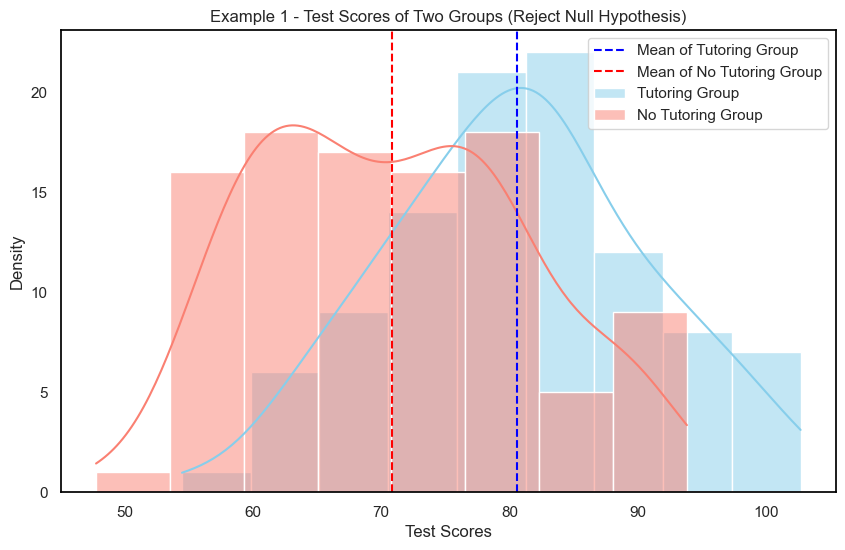

In [128]:
from scipy.stats import ttest_ind

# Generate data for students who received tutoring
np.random.seed(0)
tutoring_scores = np.random.normal(loc=80, scale=10, size=100)

# Generate data for students who didn't receive tutoring
no_tutoring_scores = np.random.normal(loc=70, scale=10, size=100)

# Perform Independent Student's t-test
t_stat, p_val = ttest_ind(tutoring_scores, no_tutoring_scores)
print("Example 1 - Comparing test scores of two groups (Rejecting the Null Hypothesis):")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in test scores of students.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in test scores of students.")

# Plot the distributions of the two samples
plt.figure(figsize=(10, 6))
sns.histplot(tutoring_scores, kde=True, color='skyblue', label='Tutoring Group')
sns.histplot(no_tutoring_scores, kde=True, color='salmon', label='No Tutoring Group')
plt.axvline(np.mean(tutoring_scores), color='blue', linestyle='--', label='Mean of Tutoring Group')
plt.axvline(np.mean(no_tutoring_scores), color='red', linestyle='--', label='Mean of No Tutoring Group')
plt.xlabel('Test Scores')
plt.ylabel('Density')
plt.title('Example 1 - Test Scores of Two Groups (Reject Null Hypothesis)')
plt.legend()
plt.grid(False)
plt.show()


Example 2 - Examining the effect of a new drug treatment (Not Rejecting the Null Hypothesis):
t-statistic: -1.2609797789472514
p-value: 0.21736669382400228
Result: Fail to reject the null hypothesis. There is no significant difference in recovery times.


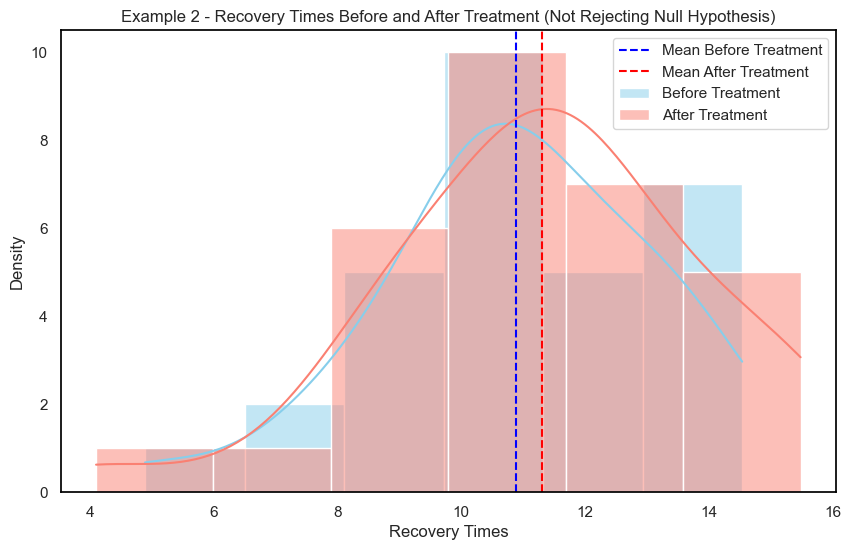

In [129]:
from scipy.stats import ttest_rel  # Importing ttest_rel function


# Generate patient recovery times before and after treatment
np.random.seed(0)
before_treatment = np.random.normal(loc=10, scale=2, size=30)  # Recovery times before treatment
after_treatment = before_treatment + np.random.normal(loc=1, scale=2, size=30)  # Recovery times after treatment

# Perform paired Student’s t-test
t_stat, p_val = ttest_rel(before_treatment, after_treatment)
print("\nExample 2 - Examining the effect of a new drug treatment (Not Rejecting the Null Hypothesis):")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in recovery times.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in recovery times.")

# Plot the distributions of the two paired samples
plt.figure(figsize=(10, 6))
sns.histplot(before_treatment, kde=True, color='skyblue', label='Before Treatment')
sns.histplot(after_treatment, kde=True, color='salmon', label='After Treatment')
plt.axvline(np.mean(before_treatment), color='blue', linestyle='--', label='Mean Before Treatment')
plt.axvline(np.mean(after_treatment), color='red', linestyle='--', label='Mean After Treatment')
plt.xlabel('Recovery Times')
plt.ylabel('Density')
plt.title('Example 2 - Recovery Times Before and After Treatment (Not Rejecting Null Hypothesis)')
plt.legend()
plt.grid(False)
plt.show()


Example 2 - Examining the effect of a new drug treatment (Not Rejecting the Null Hypothesis):
t-statistic: -1.2609797789472514
p-value: 0.21736669382400228
Result: Fail to reject the null hypothesis. There is no significant difference in recovery times.


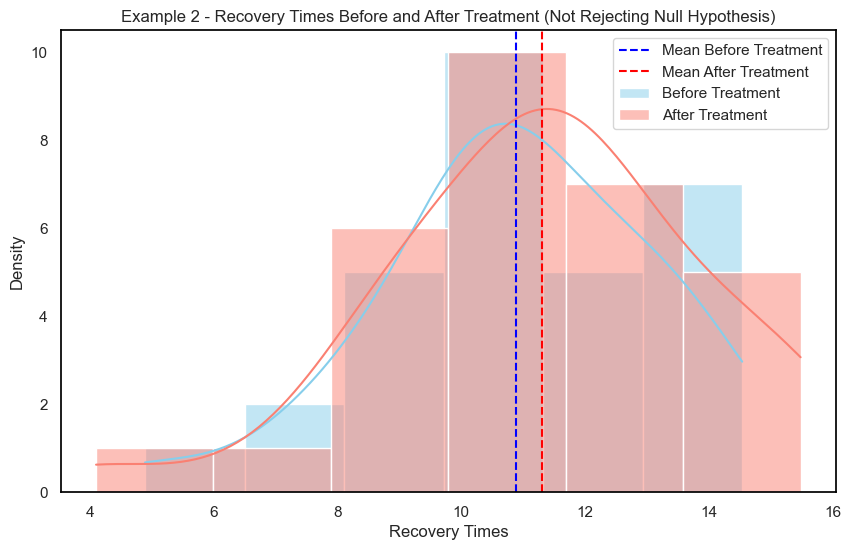

In [130]:
from scipy.stats import ttest_rel


# Generate patient recovery times before and after treatment
np.random.seed(0)
before_treatment = np.random.normal(loc=10, scale=2, size=30)  # Recovery times before treatment
after_treatment = before_treatment + np.random.normal(loc=1, scale=2, size=30)  # Recovery times after treatment

# Perform paired Student’s t-test
t_stat, p_val = ttest_rel(before_treatment, after_treatment)
print("\nExample 2 - Examining the effect of a new drug treatment (Not Rejecting the Null Hypothesis):")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in recovery times.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in recovery times.")

# Plot the distributions of the two paired samples
plt.figure(figsize=(10, 6))
sns.histplot(before_treatment, kde=True, color='skyblue', label='Before Treatment')
sns.histplot(after_treatment, kde=True, color='salmon', label='After Treatment')
plt.axvline(np.mean(before_treatment), color='blue', linestyle='--', label='Mean Before Treatment')
plt.axvline(np.mean(after_treatment), color='red', linestyle='--', label='Mean After Treatment')
plt.xlabel('Recovery Times')
plt.ylabel('Density')
plt.title('Example 2 - Recovery Times Before and After Treatment (Not Rejecting Null Hypothesis)')
plt.legend()
plt.grid(False)
plt.show()

### <font color='blueviolet'> Paired Student’s t-test

**Purpose**

Tests whether the means of two paired samples are significantly different.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* 
Observations in each sample are normally distributed.* 
Observations in each sample have the same variance* .
Observations across each sample are paired.
  
**Interpretation**

* H0: the means of the samples are equal.
* 
H1: the means of the samples are unequal.

**Examples:**

<font color='royalblue'> **Example 1:**

Comparing pre-test and post-test scores of students to evaluate the effectiveness of a teaching method.

<font color='royalblue'> **Example 2:**

Assessing changes in blood pressure levels before and after a dietary intervention in the same group of participants.

**Python Code:**


Example 1 - Comparing pre-test and post-test scores of students:
t-statistic: -2.0098578785361534
p-value: 0.05383100865131328
Result: Fail to reject the null hypothesis. There is no significant difference in test scores.


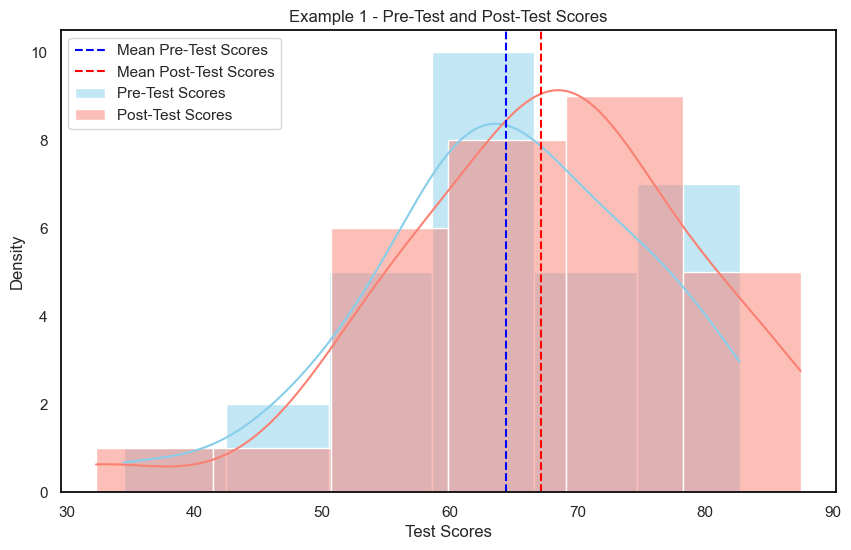

In [131]:
import numpy as np
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing pre-test and post-test scores of students
pre_test_scores = np.random.normal(loc=60, scale=10, size=30)  # Pre-test scores
post_test_scores = pre_test_scores + np.random.normal(loc=5, scale=8, size=30)  # Post-test scores

# Perform paired Student’s t-test for Example 1
t_stat_1, p_val_1 = ttest_rel(pre_test_scores, post_test_scores)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing pre-test and post-test scores of students:")
print("t-statistic:", t_stat_1)
print("p-value:", p_val_1)
if p_val_1 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in test scores.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in test scores.")

# Plot the distributions of the two paired samples for Example 1
plt.figure(figsize=(10, 6))
sns.histplot(pre_test_scores, kde=True, color='skyblue', label='Pre-Test Scores')
sns.histplot(post_test_scores, kde=True, color='salmon', label='Post-Test Scores')
plt.axvline(np.mean(pre_test_scores), color='blue', linestyle='--', label='Mean Pre-Test Scores')
plt.axvline(np.mean(post_test_scores), color='red', linestyle='--', label='Mean Post-Test Scores')
plt.xlabel('Test Scores')
plt.ylabel('Density')
plt.title('Example 1 - Pre-Test and Post-Test Scores')
plt.legend()
plt.grid(False)
plt.show()


Example 2 - Assessing changes in blood pressure levels before and after a dietary intervention:
t-statistic: -4.899093555605785
p-value: 3.3577970385058055e-05
Result: Reject the null hypothesis. There is a significant difference in blood pressure levels.


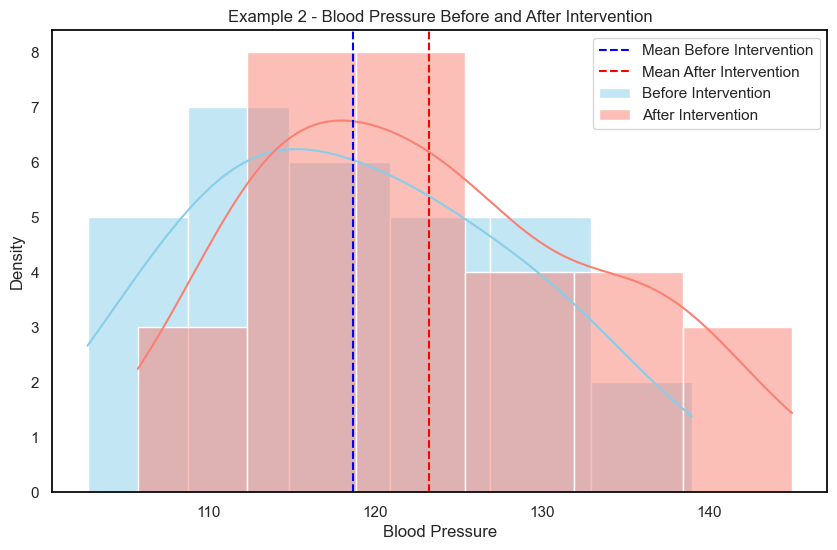

In [132]:
# Example 2: Assessing changes in blood pressure levels before and after a dietary intervention
before_bp = np.random.normal(loc=120, scale=10, size=30)  # Blood pressure before intervention
after_bp = before_bp + np.random.normal(loc=2, scale=5, size=30)  # Blood pressure after intervention

# Perform paired Student’s t-test for Example 2
t_stat_2, p_val_2 = ttest_rel(before_bp, after_bp)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Assessing changes in blood pressure levels before and after a dietary intervention:")
print("t-statistic:", t_stat_2)
print("p-value:", p_val_2)
if p_val_2 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in blood pressure levels.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in blood pressure levels.")

# Plot the distributions of the two paired samples for Example 2
plt.figure(figsize=(10, 6))
sns.histplot(before_bp, kde=True, color='skyblue', label='Before Intervention')
sns.histplot(after_bp, kde=True, color='salmon', label='After Intervention')
plt.axvline(np.mean(before_bp), color='blue', linestyle='--', label='Mean Before Intervention')
plt.axvline(np.mean(after_bp), color='red', linestyle='--', label='Mean After Intervention')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.title('Example 2 - Blood Pressure Before and After Intervention')
plt.legend()
plt.grid(False)
plt.show()

### <font color='blueviolet'> Analysis of Variance Test (ANOVA)

**Purpose**

ests whether the means of two or more paired samples are significantly different.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* 
Observations in each sample are normally distributed.* 
Observations in each sample have the same variance* .
Observations across each sample are paireion
  
**Interpretation**

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

**Examples:**

<font color='royalblue'> **Example 1:**

Comparing the effectiveness of three different teaching methods on student performance.hod.

<font color='royalblue'> **Example 2:**

Analyzing the impact of different fertilizer treatments on crop yields across multiple farms.

**Python Code:**


Example 1 - Comparing the effectiveness of three different teaching methods:
F-statistic: 3.341460670606985
p-value: 0.039981492411499175
Result: Reject the null hypothesis. There is a significant difference in student performance.
Mean of Method 1 scores: 64.42856447263175
Mean of Method 2 scores: 62.1047814384602
Mean of Method 3 scores: 68.66279004868717


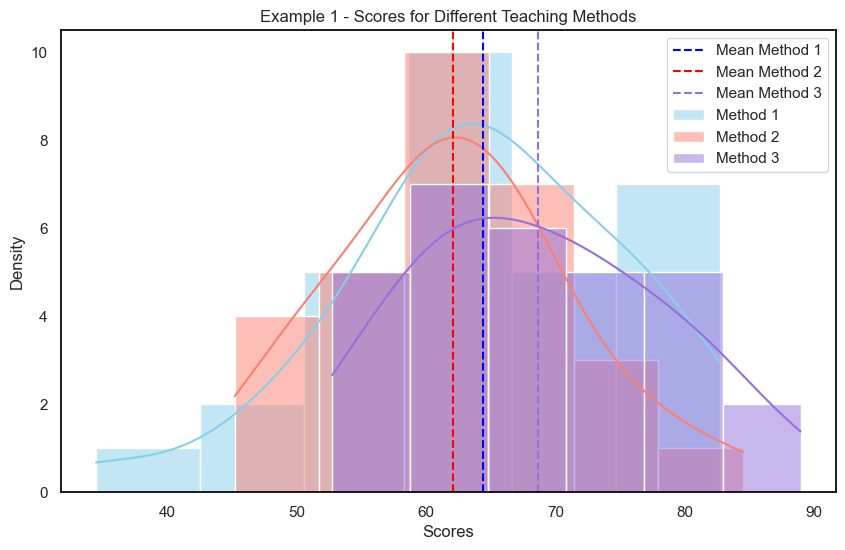

In [133]:
from scipy.stats import f_oneway


# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing the effectiveness of three different teaching methods on student performance
method_1_scores = np.random.normal(loc=60, scale=10, size=30)  # Scores for teaching method 1
method_2_scores = np.random.normal(loc=65, scale=10, size=30)  # Scores for teaching method 2
method_3_scores = np.random.normal(loc=70, scale=10, size=30)  # Scores for teaching method 3

# Perform Repeated Measures ANOVA Test for Example 1
f_stat_1, p_val_1 = f_oneway(method_1_scores, method_2_scores, method_3_scores)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing the effectiveness of three different teaching methods:")
print("F-statistic:", f_stat_1)
print("p-value:", p_val_1)
if p_val_1 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in student performance.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in student performance.")

# Print the mean of each sample for Example 1
print("Mean of Method 1 scores:", np.mean(method_1_scores))
print("Mean of Method 2 scores:", np.mean(method_2_scores))
print("Mean of Method 3 scores:", np.mean(method_3_scores))

# Plot the distributions of the scores for each teaching method for Example 1
plt.figure(figsize=(10, 6))
sns.histplot(method_1_scores, kde=True, color='skyblue', label='Method 1')
sns.histplot(method_2_scores, kde=True, color='salmon', label='Method 2')
sns.histplot(method_3_scores, kde=True, color='mediumpurple', label='Method 3')
plt.axvline(np.mean(method_1_scores), color='blue', linestyle='--', label='Mean Method 1')
plt.axvline(np.mean(method_2_scores), color='red', linestyle='--', label='Mean Method 2')
plt.axvline(np.mean(method_3_scores), color='mediumpurple', linestyle='--', label='Mean Method 3')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Example 1 - Scores for Different Teaching Methods')
plt.legend()
plt.grid(False)
plt.show()


Example 2 - Analyzing the impact of different fertilizer treatments on crop yields:
F-statistic: 1.9916632026104524
p-value: 0.14264242610641992
Result: Fail to reject the null hypothesis. There is no significant difference in crop yields.
Mean of Fertilizer 1 yields: 52.554166942355586
Mean of Fertilizer 2 yields: 52.48235567123655
Mean of Fertilizer 3 yields: 54.663751352656924


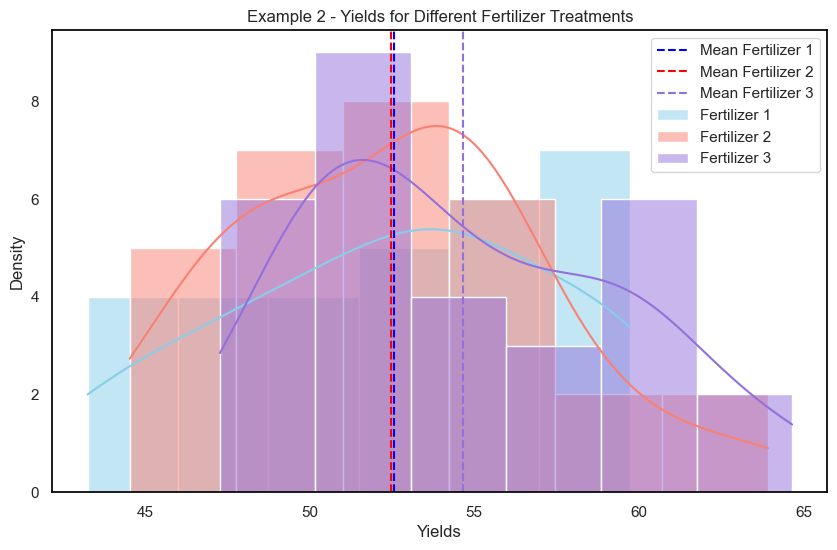

In [134]:
# Example 2: Analyzing the impact of different fertilizer treatments on crop yields across multiple farms
fertilizer_1_yields = np.random.normal(loc=50, scale=5, size=30)  # Yields for fertilizer treatment 1
fertilizer_2_yields = np.random.normal(loc=52, scale=5, size=30)  # Yields for fertilizer treatment 2
fertilizer_3_yields = np.random.normal(loc=55, scale=5, size=30)  # Yields for fertilizer treatment 3

# Perform Repeated Measures ANOVA Test for Example 2
f_stat_2, p_val_2 = f_oneway(fertilizer_1_yields, fertilizer_2_yields, fertilizer_3_yields)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Analyzing the impact of different fertilizer treatments on crop yields:")
print("F-statistic:", f_stat_2)
print("p-value:", p_val_2)
if p_val_2 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in crop yields.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in crop yields.")

# Print the mean of each sample for Example 2
print("Mean of Fertilizer 1 yields:", np.mean(fertilizer_1_yields))
print("Mean of Fertilizer 2 yields:", np.mean(fertilizer_2_yields))
print("Mean of Fertilizer 3 yields:", np.mean(fertilizer_3_yields))

# Plot the distributions of the yields for each fertilizer treatment for Example 2
plt.figure(figsize=(10, 6))
sns.histplot(fertilizer_1_yields, kde=True, color='skyblue', label='Fertilizer 1')
sns.histplot(fertilizer_2_yields, kde=True, color='salmon', label='Fertilizer 2')
sns.histplot(fertilizer_3_yields, kde=True, color='mediumpurple', label='Fertilizer 3')
plt.axvline(np.mean(fertilizer_1_yields), color='blue', linestyle='--', label='Mean Fertilizer 1')
plt.axvline(np.mean(fertilizer_2_yields), color='red', linestyle='--', label='Mean Fertilizer 2')
plt.axvline(np.mean(fertilizer_3_yields), color='mediumpurple', linestyle='--', label='Mean Fertilizer 3')
plt.xlabel('Yields')
plt.ylabel('Density')
plt.title('Example 2 - Yields for Different Fertilizer Treatments')
plt.legend()
plt.grid(False)
plt.show()


Example 1 - Comparing the effectiveness of three different teaching methods:
F-statistic: 3.341460670606985
p-value: 0.039981492411499175
Result: Reject the null hypothesis. There is a significant difference in student performance.
Mean of Method 1 scores: 64.42856447263175
Mean of Method 2 scores: 62.1047814384602
Mean of Method 3 scores: 68.66279004868717


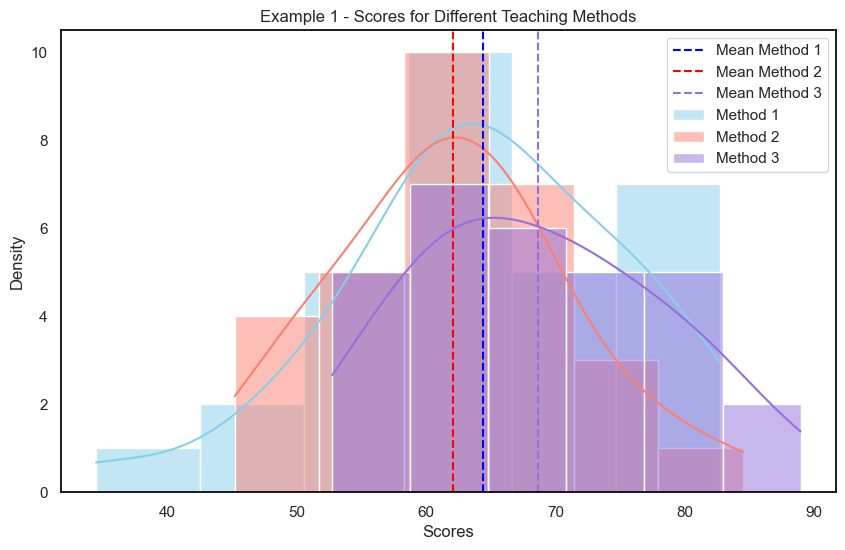

In [135]:
from scipy.stats import f_oneway


# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing the effectiveness of three different teaching methods on student performance
method_1_scores = np.random.normal(loc=60, scale=10, size=30)  # Scores for teaching method 1
method_2_scores = np.random.normal(loc=65, scale=10, size=30)  # Scores for teaching method 2
method_3_scores = np.random.normal(loc=70, scale=10, size=30)  # Scores for teaching method 3

# Perform Repeated Measures ANOVA Test for Example 1
f_stat_1, p_val_1 = f_oneway(method_1_scores, method_2_scores, method_3_scores)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing the effectiveness of three different teaching methods:")
print("F-statistic:", f_stat_1)
print("p-value:", p_val_1)
if p_val_1 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in student performance.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in student performance.")

# Print the mean of each sample for Example 1
print("Mean of Method 1 scores:", np.mean(method_1_scores))
print("Mean of Method 2 scores:", np.mean(method_2_scores))
print("Mean of Method 3 scores:", np.mean(method_3_scores))

# Plot the distributions of the scores for each teaching method for Example 1
plt.figure(figsize=(10, 6))
sns.histplot(method_1_scores, kde=True, color='skyblue', label='Method 1')
sns.histplot(method_2_scores, kde=True, color='salmon', label='Method 2')
sns.histplot(method_3_scores, kde=True, color='mediumpurple', label='Method 3')
plt.axvline(np.mean(method_1_scores), color='blue', linestyle='--', label='Mean Method 1')
plt.axvline(np.mean(method_2_scores), color='red', linestyle='--', label='Mean Method 2')
plt.axvline(np.mean(method_3_scores), color='mediumpurple', linestyle='--', label='Mean Method 3')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Example 1 - Scores for Different Teaching Methods')
plt.legend()
plt.grid(False)
plt.show()


Example 2 - Analyzing the impact of different fertilizer treatments on crop yields:
F-statistic: 0.4268059846450025
p-value: 0.6539491067426666
Result: Fail to reject the null hypothesis. There is no significant difference in crop yields.
Mean of Fertilizer 1 yields: 52.554166942355586
Mean of Fertilizer 2 yields: 51.48235567123655
Mean of Fertilizer 3 yields: 51.663751352656924


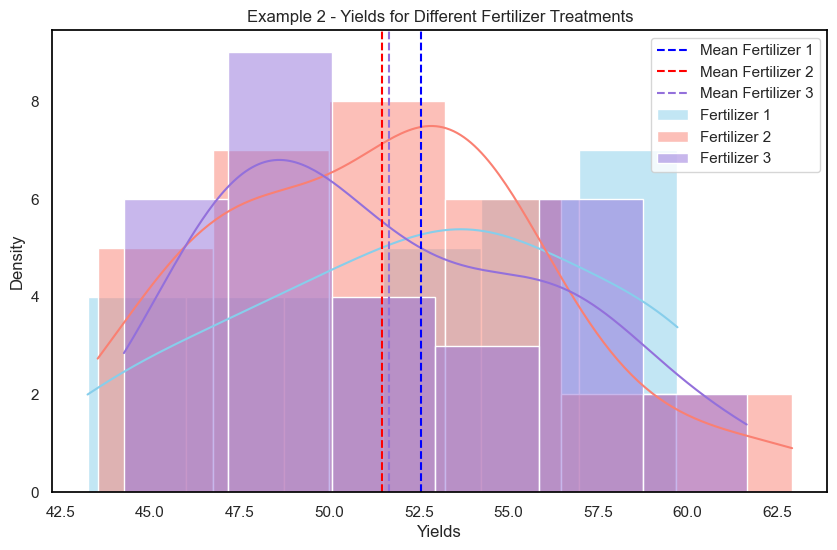

In [136]:
# Example 2: Analyzing the impact of different fertilizer treatments on crop yields across multiple farms
fertilizer_1_yields = np.random.normal(loc=50, scale=5, size=30)  # Yields for fertilizer treatment 1
fertilizer_2_yields = np.random.normal(loc=51, scale=5, size=30)  # Yields for fertilizer treatment 2
fertilizer_3_yields = np.random.normal(loc=52, scale=5, size=30)  # Yields for fertilizer treatment 3

# Perform Repeated Measures ANOVA Test for Example 2
f_stat_2, p_val_2 = f_oneway(fertilizer_1_yields, fertilizer_2_yields, fertilizer_3_yields)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Analyzing the impact of different fertilizer treatments on crop yields:")
print("F-statistic:", f_stat_2)
print("p-value:", p_val_2)
if p_val_2 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in crop yields.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in crop yields.")

# Print the mean of each sample for Example 2
print("Mean of Fertilizer 1 yields:", np.mean(fertilizer_1_yields))
print("Mean of Fertilizer 2 yields:", np.mean(fertilizer_2_yields))
print("Mean of Fertilizer 3 yields:", np.mean(fertilizer_3_yields))

# Plot the distributions of the yields for each fertilizer treatment for Example 2
plt.figure(figsize=(10, 6))
sns.histplot(fertilizer_1_yields, kde=True, color='skyblue', label='Fertilizer 1')
sns.histplot(fertilizer_2_yields, kde=True, color='salmon', label='Fertilizer 2')
sns.histplot(fertilizer_3_yields, kde=True, color='mediumpurple', label='Fertilizer 3')
plt.axvline(np.mean(fertilizer_1_yields), color='blue', linestyle='--', label='Mean Fertilizer 1')
plt.axvline(np.mean(fertilizer_2_yields), color='red', linestyle='--', label='Mean Fertilizer 2')
plt.axvline(np.mean(fertilizer_3_yields), color='mediumpurple', linestyle='--', label='Mean Fertilizer 3')
plt.xlabel('Yields')
plt.ylabel('Density')
plt.title('Example 2 - Yields for Different Fertilizer Treatments')
plt.legend()
plt.grid(False)
plt.show()

### <font color='blueviolet'> Repeated Measures ANOVA Test

**Purpose**

Tests whether the means of two or more paired samples are significantly different.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.
  
**Interpretation**

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

**Examples:**

<font color='royalblue'> **Example 1:**


Investigating changes in participants' anxiety levels over time under different experimental conditions.

<font color='royalblue'> **Example 2:** 


Examining the effects of various exercise regimens on individuals' cardiovascular fitness levels measured before and after each regimen.

**Python Code:**

Currently not supported in Python.

### <font color='blueviolet'> Comparison of Parametric Statistical Hypothesis Tests:

<font color='mediumvioletred'> **Student’s t-test**

**Advantages:**

Suitable for comparing means of two independent samples.
Robustness against moderate violations of normality assumptions.
Provides a straightforward interpretation of results.

**Disadvantages:**

Assumes equal variances between the samples.
Sensitive to outliers.

**Power:**

Moderate power for detecting differences in means.

**Sensitivity:**

Sensitive to differences in means, especially with larger sample sizes.

**Ease of Interpretation:**

Results are easy to interpret, with a clear comparison between means.

**Common Usage:**

Widely used in various fields, including psychology, biology, and social sciences.

<font color='mediumvioletred'> **Paired Student’s t-test**

**Advantages:**

Suitable for comparing means of paired samples, eliminating the need to assume equal variances.
More powerful than the unpaired t-test when observations are paired.

**Disadvantages:**

Assumes normality of the paired differences.
Sensitive to outliers in the paired differences.

**Power:**

Moderate to high power for detecting differences in paired means.

**Sensitivity:**

Sensitive to differences in paired means, especially with larger sample sizes.

**Ease of Interpretation:**

Results are straightforward to interpret, with a direct comparison between paired means.

**Common Usage:**

Commonly used in experimental designs where subjects are measured before and after an intervention or treatment.

<font color='mediumvioletred'> **Analysis of Variance Test (ANOVA)**

**Advantages:**

Allows comparison of means across multiple groups simultaneously.
Provides information about overall group differences as well as pairwise comparisons.
Robustness against violations of normality assumptions, especially with larger sample sizes.

**Disadvantages:**

Assumes equal variances and normally distributed residuals.
Requires larger sample sizes to achieve adequate power when comparing multiple groups.

**Power:**

Moderate to high power for detecting differences in means across multiple groups.

**Sensitivity:**

Sensitive to differences in means, especially with larger sample sizes.

**Ease of Interpretation:**

Provides detailed information about group differences but may require more complex interpretation due to multiple comparisons.

**Common Usage:**

Frequently used in experimental and observational studies with multiple treatment groups or categorical predictors.

<font color='mediumvioletred'> **Repeated Measures ANOVA Test**

**Advantages:**

Specifically designed for comparing means of repeated measurements within the same subjects.
Accounts for within-subject variability and correlation between repeated measures.

**Disadvantages:**

Assumes sphericity (homogeneity of variances) and normality of residuals.
Requires larger sample sizes to achieve adequate power.

**Power:**

Moderate to high power for detecting differences in means across multiple repeated measures.

**Sensitivity:**

Sensitive to differences in means across repeated measures, especially with larger sample sizes.

**Ease of Interpretation:**

Provides detailed information about within-subject changes over time and potential treatment effects.

**Common Usage:**

Commonly used in longitudinal studies, clinical trials, and other research designs involving repeated measurements on the same subjects.


<font color='mediumvioletred'> **Overall Comparison:**

**Power:**

Student’s t-test: Moderate power for comparing means of independent samples.
Paired Student’s t-test: Moderate to high power for comparing means of paired samples.
ANOVA: Moderate to high power for comparing means across multiple groups.
Repeated Measures ANOVA: Moderate to high power for comparing means of repeated measurements within subjects.

**Sensitivity:**

All tests are sensitive to differences in means, especially with larger sample sizes.

**Ease of Interpretation:**

Student’s t-test and Paired Student’s t-test offer straightforward interpretations, comparing means directly.
ANOVA provides detailed information about group differences but may require more complex interpretation due to multiple comparisons.
Repeated Measures ANOVA provides detailed information about within-subject changes over time and potential treatment effects.

**Common Usage:**

Student’s t-test: Widely used in various fields for comparing means of independent samples.
Paired Student’s t-test: Commonly used in experimental designs with paired measurements.
ANOVA: Frequently used in experimental and observational studies with multiple treatment groups or categorical predictors.
Repeated Measures ANOVA: Commonly used in longitudinal studies and clinical trials involving repeated measurements on the same subjects.


<font color='mediumvioletred'> **Summary:**
* The Student’s t-test is suitable for comparing means of two independent samples but assumes equal variances.
* The Paired Student’s t-test compares means of paired samples and is more powerful when observations are paired.
* ANOVA allows comparison of means across multiple groups but requires equal variances and normally distributed residuals.
* Repeated Measures ANOVA compares means of repeated measurements within subjects and accounts for within-subject variability.
* The choice of test depends on the study design, assumptions, and specific research questions.

## <font color='crimson'> 5. Nonparametric Statistical Hypothesis Tests
<font color='mediumblue'> **This section lists statistical tests that you can use to compare data samples.**

### <font color='blueviolet'> Mann-Whitney U Test

**Purpose**

Tests whether the distributions of two independent samples are equal or not.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

**Interpretation**

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

**Examples:**

<font color='royalblue'> **Example 1:**

Comparing the median income levels of two different cities.

<font color='royalblue'> **Example 2:** 

Analyzing the difference in website loading times between two different browsers.

**Python Code:**


Example 1 - Comparing median income levels of two different cities:
Mann-Whitney U statistic: 522.0
p-value: 0.2904721494938346
Result: Fail to reject the null hypothesis. The distributions of income levels in both cities are likely equal.


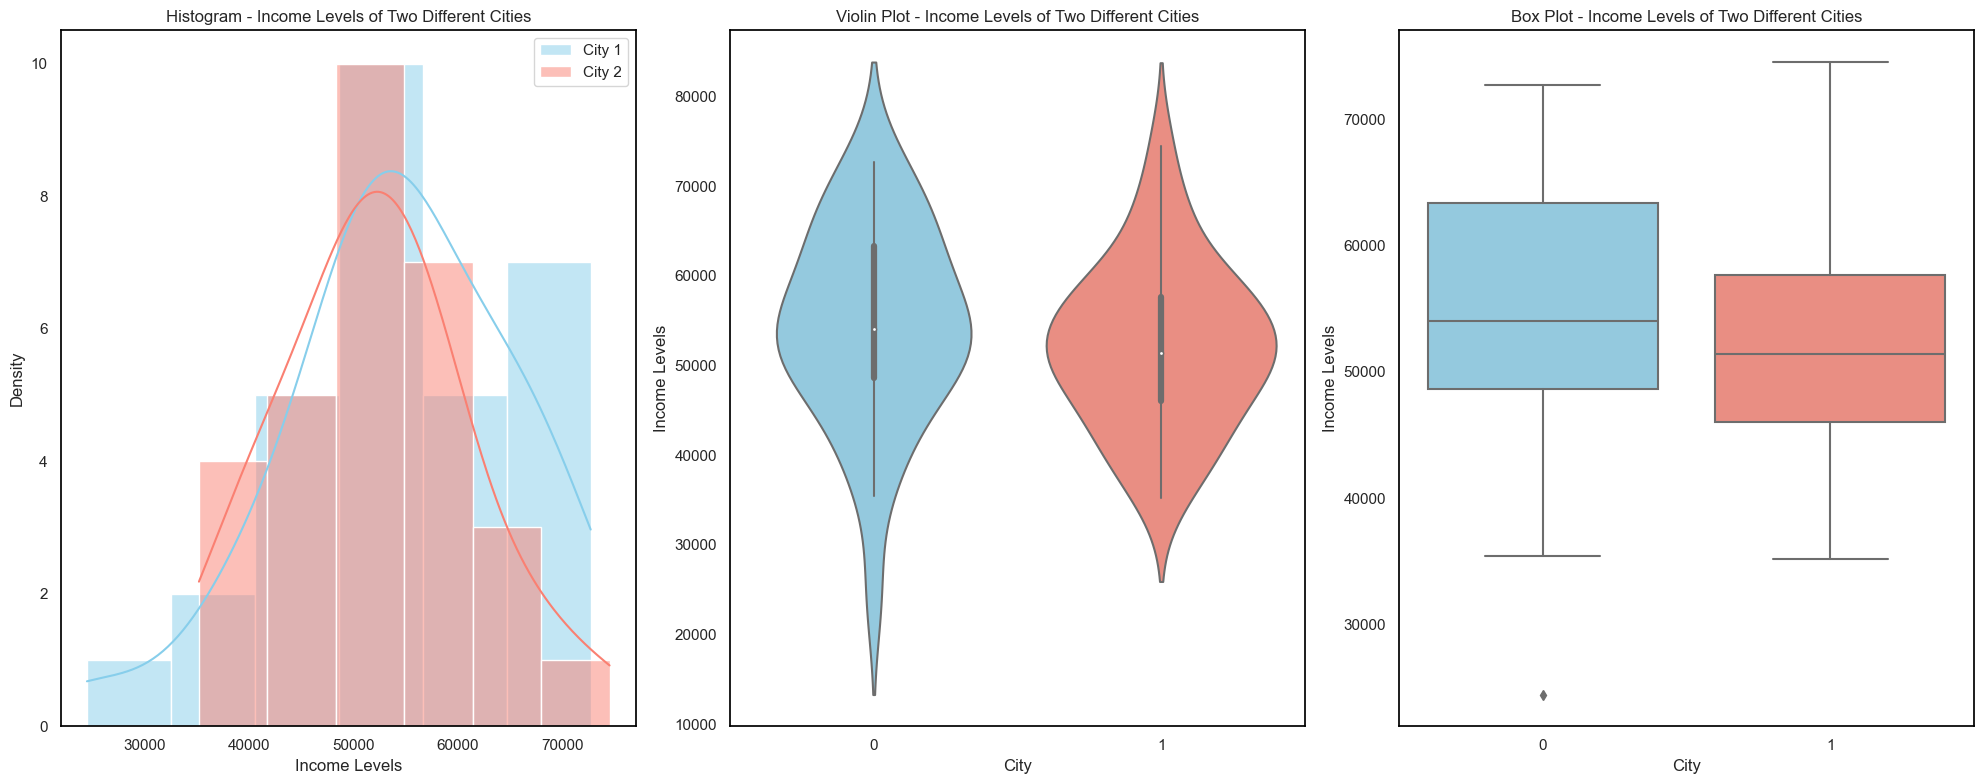

In [137]:
from scipy.stats import mannwhitneyu

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  

# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing the median income levels of two different cities
city1_income = np.random.normal(loc=50000, scale=10000, size=30)  # Income levels for city 1
city2_income = np.random.normal(loc=55000, scale=10000, size=30)  # Income levels for city 2

# Perform Mann-Whitney U Test for Example 1
statistic_1, p_value_1 = mannwhitneyu(city1_income, city2_income)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing median income levels of two different cities:")
print("Mann-Whitney U statistic:", statistic_1)
print("p-value:", p_value_1)
if p_value_1 > 0.05:
    print("Result: Fail to reject the null hypothesis. The distributions of income levels in both cities are likely equal.")
else:
    print("Result: Reject the null hypothesis. The distributions of income levels in both cities are likely not equal.")

# Plot the distributions of income levels for each city for Example 1
plt.figure(figsize=(20, 8))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(city1_income, kde=True, color='skyblue', label='City 1')
sns.histplot(city2_income, kde=True, color='salmon', label='City 2')
plt.xlabel('Income Levels')
plt.ylabel('Density')
plt.title('Histogram - Income Levels of Two Different Cities')
plt.legend()
plt.grid(False)  

# Violin plot
plt.subplot(1, 3, 2)
sns.violinplot(data=[city1_income, city2_income], palette=['skyblue', 'salmon'])
plt.title('Violin Plot - Income Levels of Two Different Cities')
plt.xlabel('City')
plt.ylabel('Income Levels')
plt.grid(False)  

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=[city1_income, city2_income], palette=['skyblue', 'salmon'])
plt.title('Box Plot - Income Levels of Two Different Cities')
plt.xlabel('City')
plt.ylabel('Income Levels')
plt.grid(False)  

plt.tight_layout()
plt.show()


Example 2 - Analyzing the difference in website loading times between two browsers:
Mann-Whitney U statistic: 110.0
p-value: 5.185675139382169e-07
Result: Reject the null hypothesis. The distributions of loading times in both browsers are likely not equal.


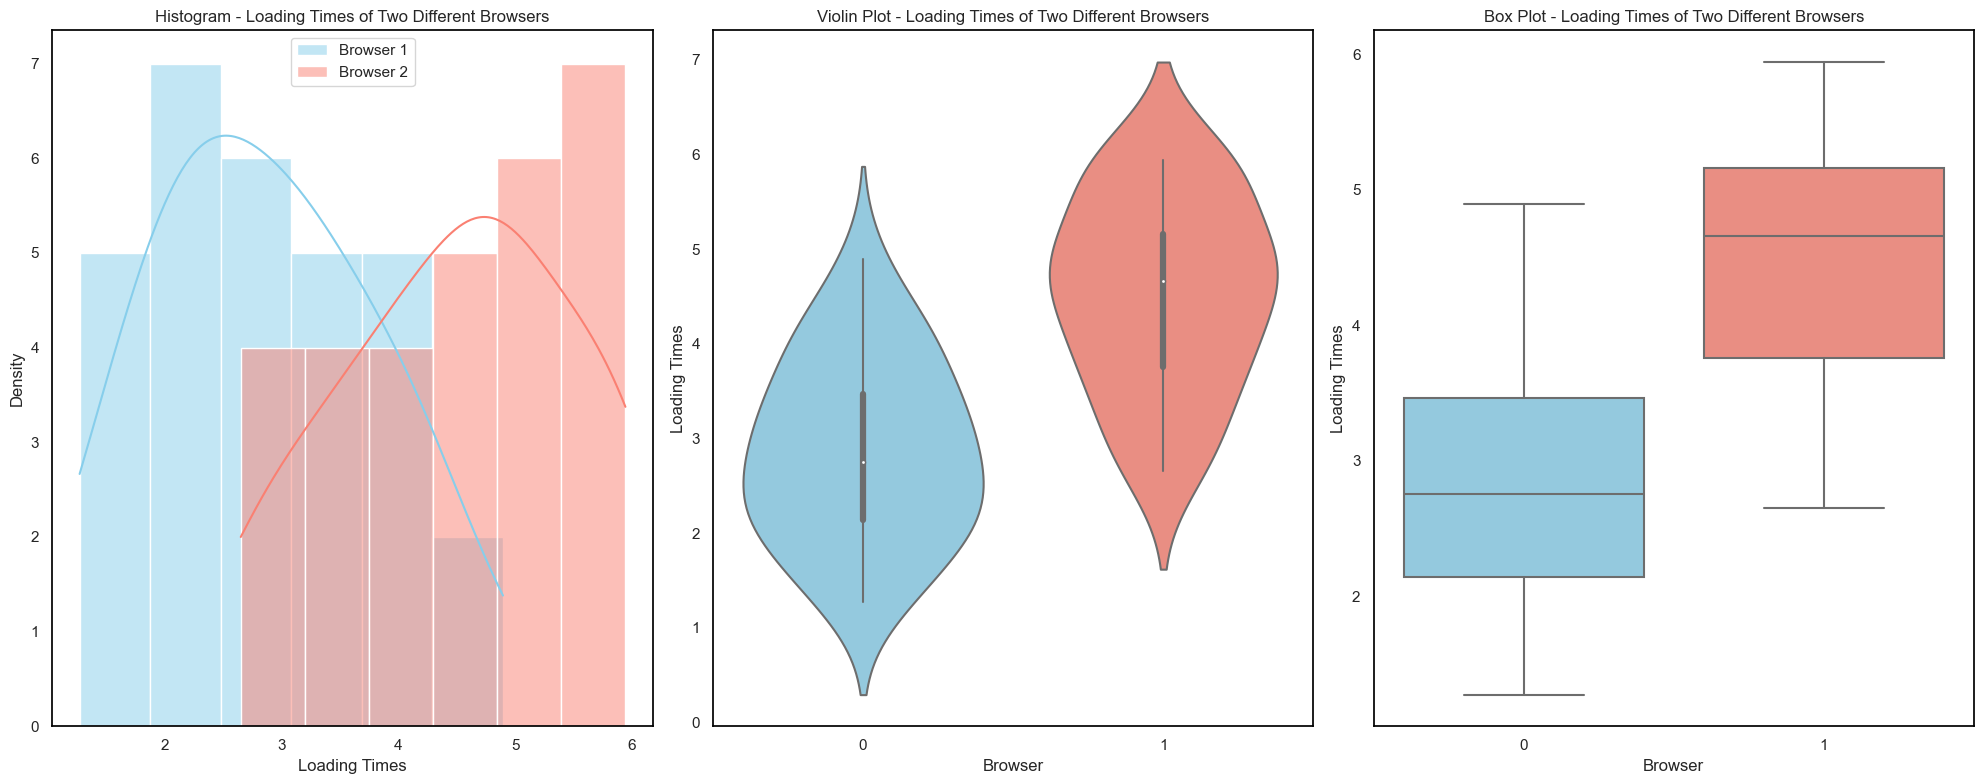

In [138]:
# Example 2: Analyzing the difference in website loading times between two different browsers
browser1_loading_times = np.random.normal(loc=3, scale=1, size=30)  # Loading times for browser 1
browser2_loading_times = np.random.normal(loc=4, scale=1, size=30)  # Loading times for browser 2

# Perform Mann-Whitney U Test for Example 2
statistic_2, p_value_2 = mannwhitneyu(browser1_loading_times, browser2_loading_times)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Analyzing the difference in website loading times between two browsers:")
print("Mann-Whitney U statistic:", statistic_2)
print("p-value:", p_value_2)
if p_value_2 > 0.05:
    print("Result: Fail to reject the null hypothesis. The distributions of loading times in both browsers are likely equal.")
else:
    print("Result: Reject the null hypothesis. The distributions of loading times in both browsers are likely not equal.")

# Plot the distributions of loading times for each browser for Example 2
plt.figure(figsize=(20, 8))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(browser1_loading_times, kde=True, color='skyblue', label='Browser 1')
sns.histplot(browser2_loading_times, kde=True, color='salmon', label='Browser 2')
plt.xlabel('Loading Times')
plt.ylabel('Density')
plt.title('Histogram - Loading Times of Two Different Browsers')
plt.legend()
plt.grid(False)  

# Violin plot
plt.subplot(1, 3, 2)
sns.violinplot(data=[browser1_loading_times, browser2_loading_times], palette=['skyblue', 'salmon'])
plt.title('Violin Plot - Loading Times of Two Different Browsers')
plt.xlabel('Browser')
plt.ylabel('Loading Times')
plt.grid(False) 

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=[browser1_loading_times, browser2_loading_times], palette=['skyblue', 'salmon'])
plt.title('Box Plot - Loading Times of Two Different Browsers')
plt.xlabel('Browser')
plt.ylabel('Loading Times')
plt.grid(False)  

plt.tight_layout()
plt.show()

### <font color='blueviolet'> Wilcoxon Signed-Rank Test
**Purpose**

Tests whether the distributions of two paired samples are equal or not.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* 
Observations in each sample can be ranked.* 
Observations across each sample are paired.

**Interpretation**

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

**Examples:**

<font color='royalblue'> **Example 1:**

Comparing the scores of students before and after a tutoring program to assess its effectiveness.

<font color='royalblue'> **Example 2:** 

Analyzing the difference in reaction times of participants before and after completing a cognitive training exercises.

**Python Code:**


Example 1 - Comparing scores before and after tutoring:
Wilcoxon Signed-Rank statistic: 147.0
p-value: 0.0803273618221283
Result: Fail to reject the null hypothesis. There is no significant difference in scores before and after tutoring.


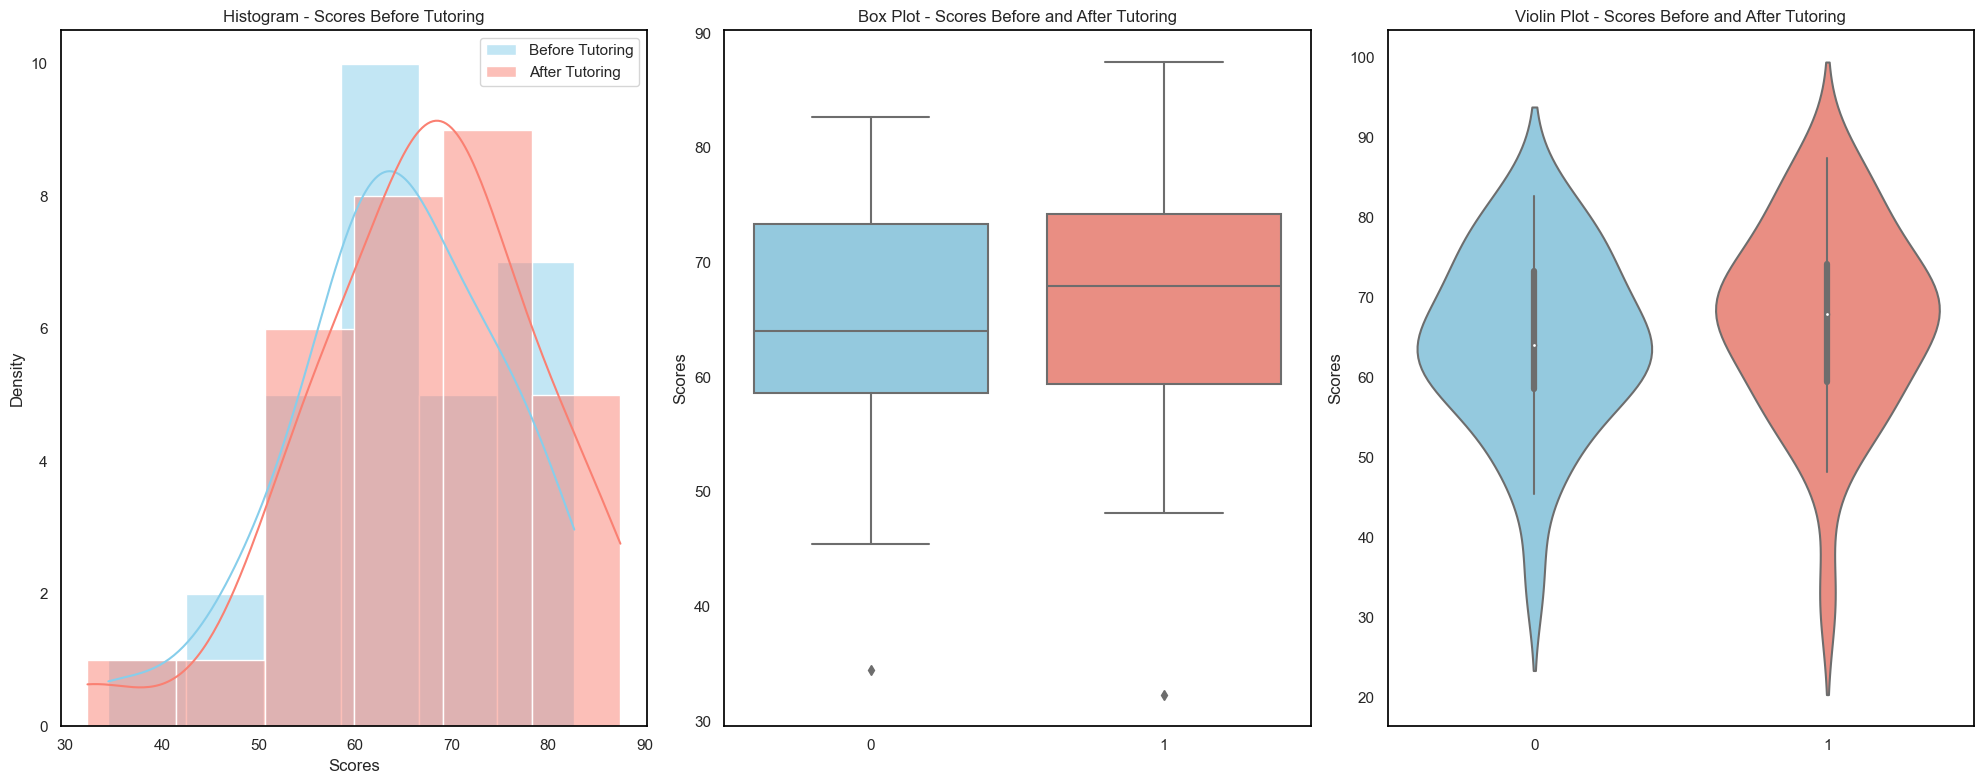

In [139]:
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  

# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing the scores of students before and after a tutoring program
before_tutoring_scores = np.random.normal(loc=60, scale=10, size=30)  # Scores before tutoring
after_tutoring_scores = before_tutoring_scores + np.random.normal(loc=5, scale=8, size=30)  # Scores after tutoring

# Perform Wilcoxon Signed-Rank Test for Example 1
statistic_1, p_value_1 = wilcoxon(before_tutoring_scores, after_tutoring_scores)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing scores before and after tutoring:")
print("Wilcoxon Signed-Rank statistic:", statistic_1)
print("p-value:", p_value_1)
if p_value_1 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in scores before and after tutoring.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in scores before and after tutoring.")

# Plot the distributions of scores before and after tutoring using histplot, box plot, and violin plot for Example 1
plt.figure(figsize=(20, 8))

# Histogram for before tutoring scores
plt.subplot(1, 3, 1)
sns.histplot(before_tutoring_scores, kde=True, color='skyblue', label='Before Tutoring')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('Histogram - Scores Before Tutoring')
plt.legend()
plt.grid(False)

# Adding histogram for after tutoring scores
sns.histplot(after_tutoring_scores, kde=True, color='salmon', label='After Tutoring')
plt.legend()

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=[before_tutoring_scores, after_tutoring_scores], palette=['skyblue', 'salmon'])
plt.title('Box Plot - Scores Before and After Tutoring')
plt.ylabel('Scores')
plt.grid(False) 

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=[before_tutoring_scores, after_tutoring_scores], palette=['skyblue', 'salmon'])
plt.title('Violin Plot - Scores Before and After Tutoring')
plt.ylabel('Scores')
plt.grid(False)  

plt.tight_layout()
plt.show()


Example 2 - Analyzing reaction times before and after cognitive training:
Wilcoxon Signed-Rank statistic: 28.0
p-value: 2.7623027563095093e-06
Result: Reject the null hypothesis. There is a significant difference in reaction times before and after training.


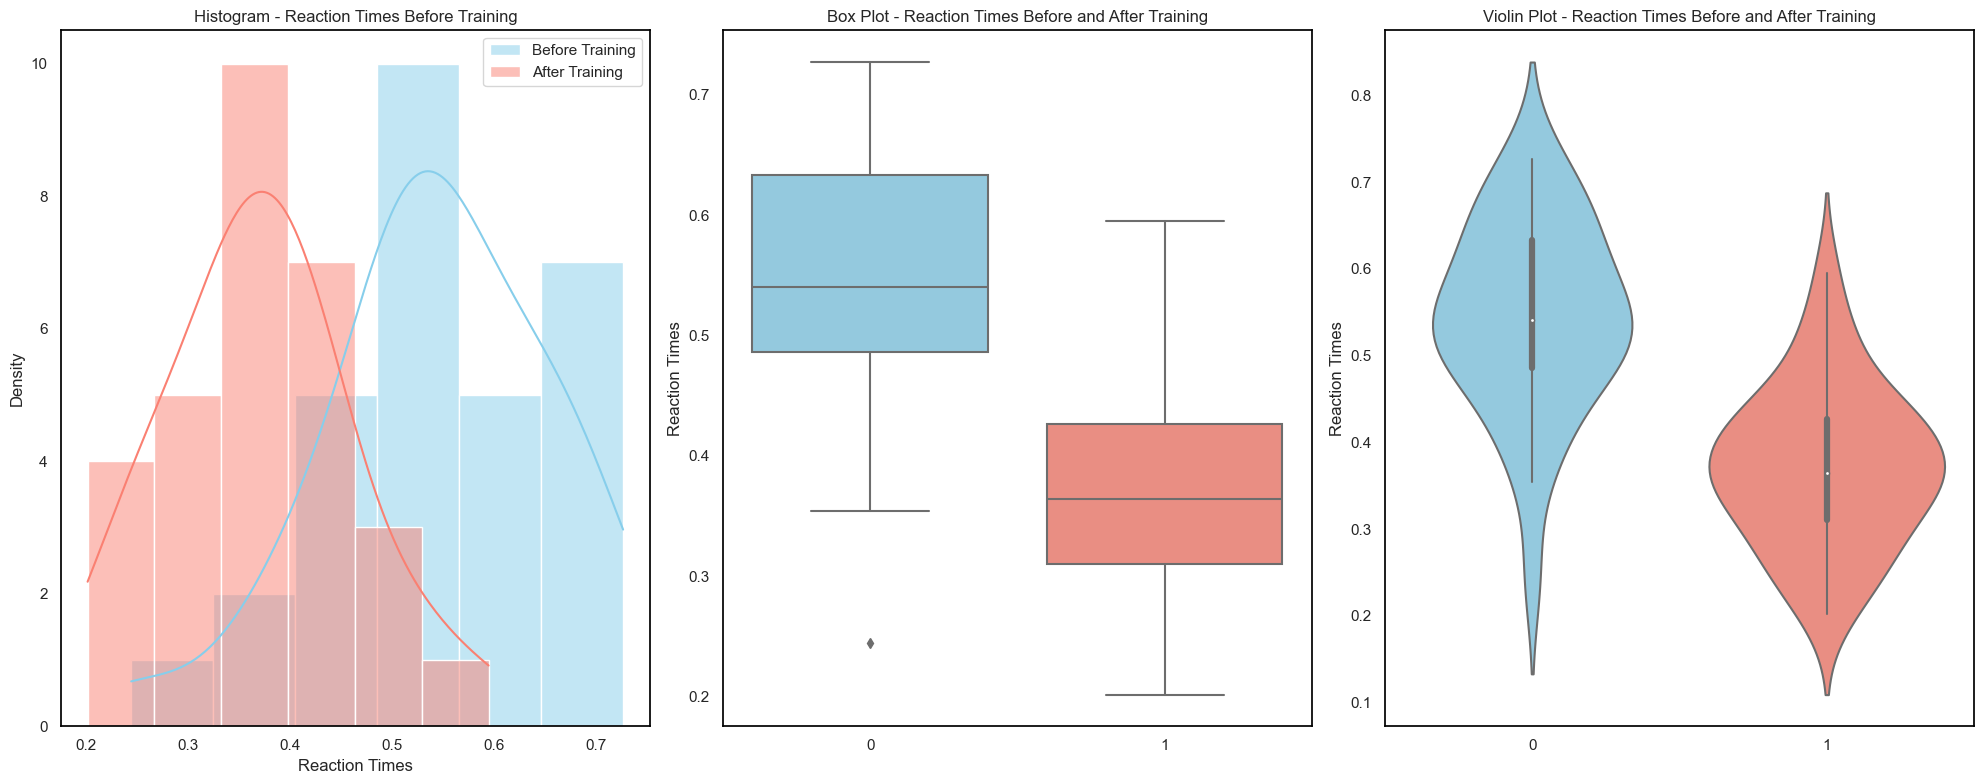

In [140]:
import numpy as np
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black' 
plt.rcParams['axes.edgecolor'] = 'black' 

# Set random seed for reproducibility
np.random.seed(0)

# Example 2: Analyzing the difference in reaction times of participants before and after a cognitive training exercise
before_training_reaction_times = np.random.normal(loc=0.5, scale=0.1, size=30)  # Reaction times before training
after_training_reaction_times = np.random.normal(loc=0.4, scale=0.1, size=30)  # Reaction times after training

# Perform Wilcoxon Signed-Rank Test for Example 2
statistic_2, p_value_2 = wilcoxon(before_training_reaction_times, after_training_reaction_times)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Analyzing reaction times before and after cognitive training:")
print("Wilcoxon Signed-Rank statistic:", statistic_2)
print("p-value:", p_value_2)
if p_value_2 < 0.05:
    print("Result: Reject the null hypothesis. There is a significant difference in reaction times before and after training.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in reaction times before and after training.")

# Plot the distributions of reaction times before and after training using histplot, box plot, and violin plot for Example 2
plt.figure(figsize=(20, 8))

# Histogram for before training reaction times
plt.subplot(1, 3, 1)
sns.histplot(before_training_reaction_times, kde=True, color='skyblue', label='Before Training')
plt.xlabel('Reaction Times')
plt.ylabel('Density')
plt.title('Histogram - Reaction Times Before Training')
plt.legend()
plt.grid(False) 

# Adding histogram for after training reaction times
sns.histplot(after_training_reaction_times, kde=True, color='salmon', label='After Training')
plt.legend()
plt.grid(False)  

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=[before_training_reaction_times, after_training_reaction_times], palette=['skyblue', 'salmon'])
plt.title('Box Plot - Reaction Times Before and After Training')
plt.ylabel('Reaction Times')
plt.grid(False)  

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=[before_training_reaction_times, after_training_reaction_times], palette=['skyblue', 'salmon'])
plt.title('Violin Plot - Reaction Times Before and After Training')
plt.ylabel('Reaction Times')
plt.grid(False)  

plt.tight_layout()
plt.show()

### <font color='blueviolet'> Kruskal-Wallis H Test

**Purpose**

Tests whether the distributions of two or more independent samples are equal or not.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

**Interpretation**

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

**Examples:**

<font color='royalblue'> **Example 1:**

Comparing the effectiveness of three different medications on pain relief.

<font color='royalblue'> **Example 2:** 

Assessing the impact of different soil types on plant growth across multiple experimental plots.

**Python Code:**


Example 1 - Comparing the effectiveness of three different medications on pain relief:
Kruskal-Wallis H statistic: 24.434969474969478
p-value: 4.943263894806853e-06
Result: Reject the null hypothesis. The distributions of pain relief scores for different medications are likely not equal.


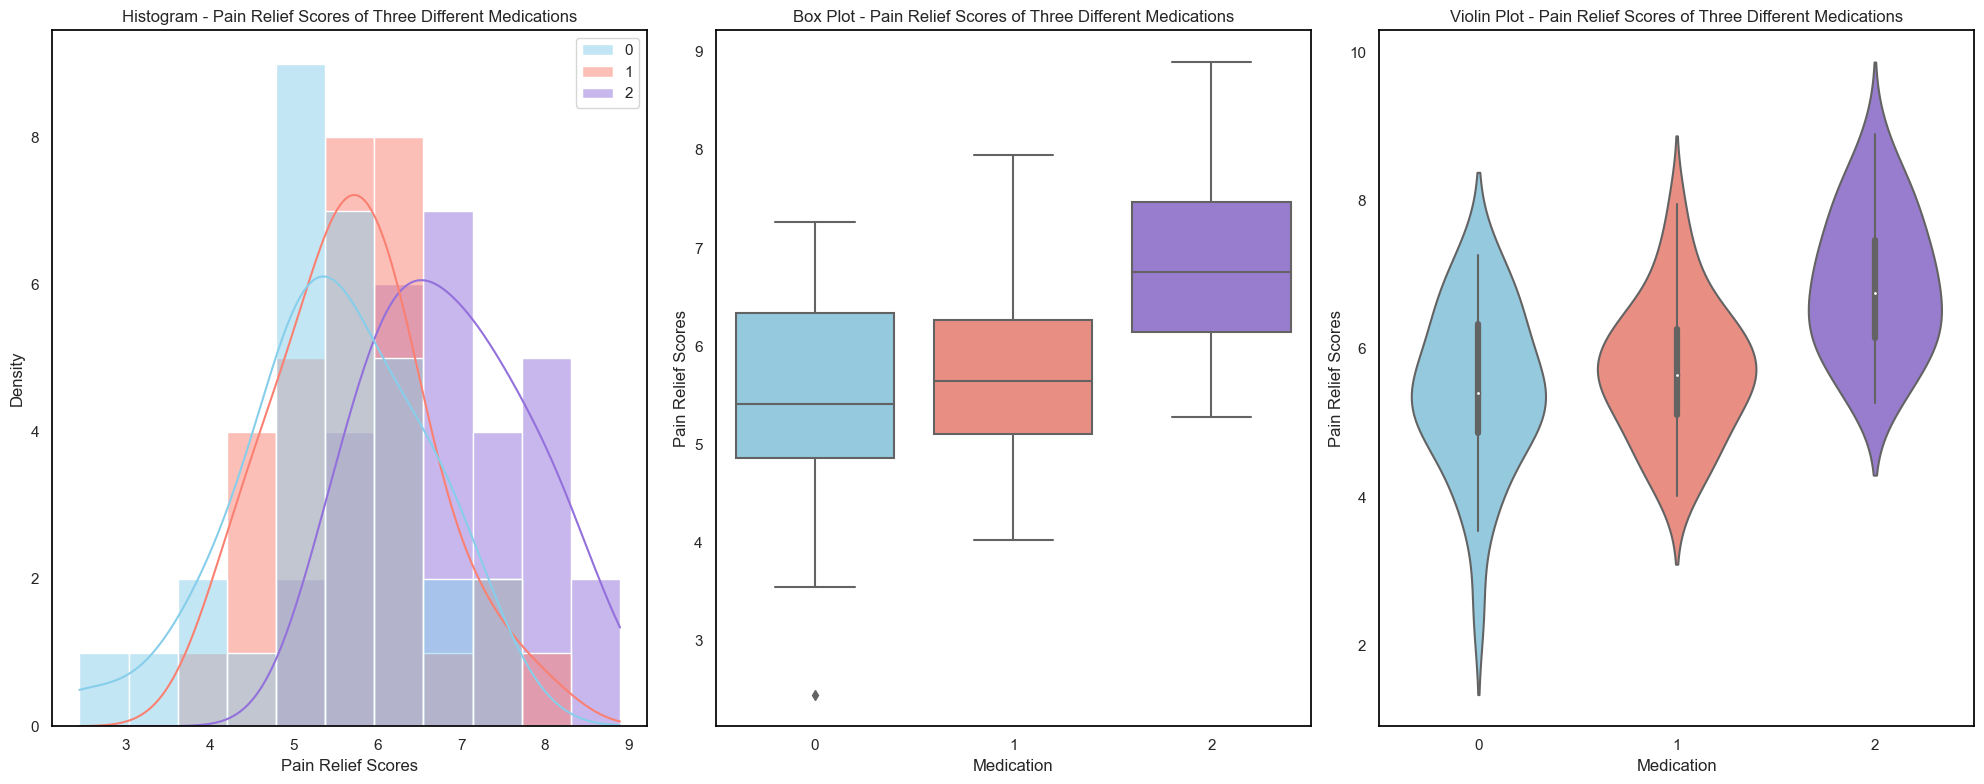

In [141]:
import numpy as np
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black
plt.rcParams['axes.edgecolor'] = 'black'  # Set border color to black

# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Comparing the effectiveness of three different medications on pain relief
medication1_pain_relief = np.random.normal(loc=5, scale=1, size=30)  # Pain relief scores for medication 1
medication2_pain_relief = np.random.normal(loc=6, scale=1, size=30)  # Pain relief scores for medication 2
medication3_pain_relief = np.random.normal(loc=7, scale=1, size=30)  # Pain relief scores for medication 3

# Perform Kruskal-Wallis H test for Example 1
statistic_1, p_value_1 = kruskal(medication1_pain_relief, medication2_pain_relief, medication3_pain_relief)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Comparing the effectiveness of three different medications on pain relief:")
print("Kruskal-Wallis H statistic:", statistic_1)
print("p-value:", p_value_1)
if p_value_1 < 0.05:
    print("Result: Reject the null hypothesis. The distributions of pain relief scores for different medications are likely not equal.")
else:
    print("Result: Fail to reject the null hypothesis. The distributions of pain relief scores for different medications are likely equal.")

# Plot the distributions of pain relief scores for each medication for Example 1 using histplot, boxplot, and violin plot
plt.figure(figsize=(20, 8))

# Histogram for Example 1
plt.subplot(1, 3, 1)
sns.histplot(data=[medication1_pain_relief, medication2_pain_relief, medication3_pain_relief], kde=True, palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Histogram - Pain Relief Scores of Three Different Medications')
plt.xlabel('Pain Relief Scores')
plt.ylabel('Density')
plt.grid(False)  # Remove grid

# Box plot for Example 1
plt.subplot(1, 3, 2)
sns.boxplot(data=[medication1_pain_relief, medication2_pain_relief, medication3_pain_relief], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Box Plot - Pain Relief Scores of Three Different Medications')
plt.xlabel('Medication')
plt.ylabel('Pain Relief Scores')
plt.grid(False)  # Remove grid

# Violin plot for Example 1
plt.subplot(1, 3, 3)
sns.violinplot(data=[medication1_pain_relief, medication2_pain_relief, medication3_pain_relief], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Violin Plot - Pain Relief Scores of Three Different Medications')
plt.xlabel('Medication')
plt.ylabel('Pain Relief Scores')
plt.grid(False)  # Remove grid

plt.tight_layout()
plt.show()


Example 2 - Assessing the impact of different soil types on plant growth:
Kruskal-Wallis H statistic: 1.1154090354090158
p-value: 0.5725217702125995
Result: Fail to reject the null hypothesis. The distributions of plant growth for different soil types are likely equal.


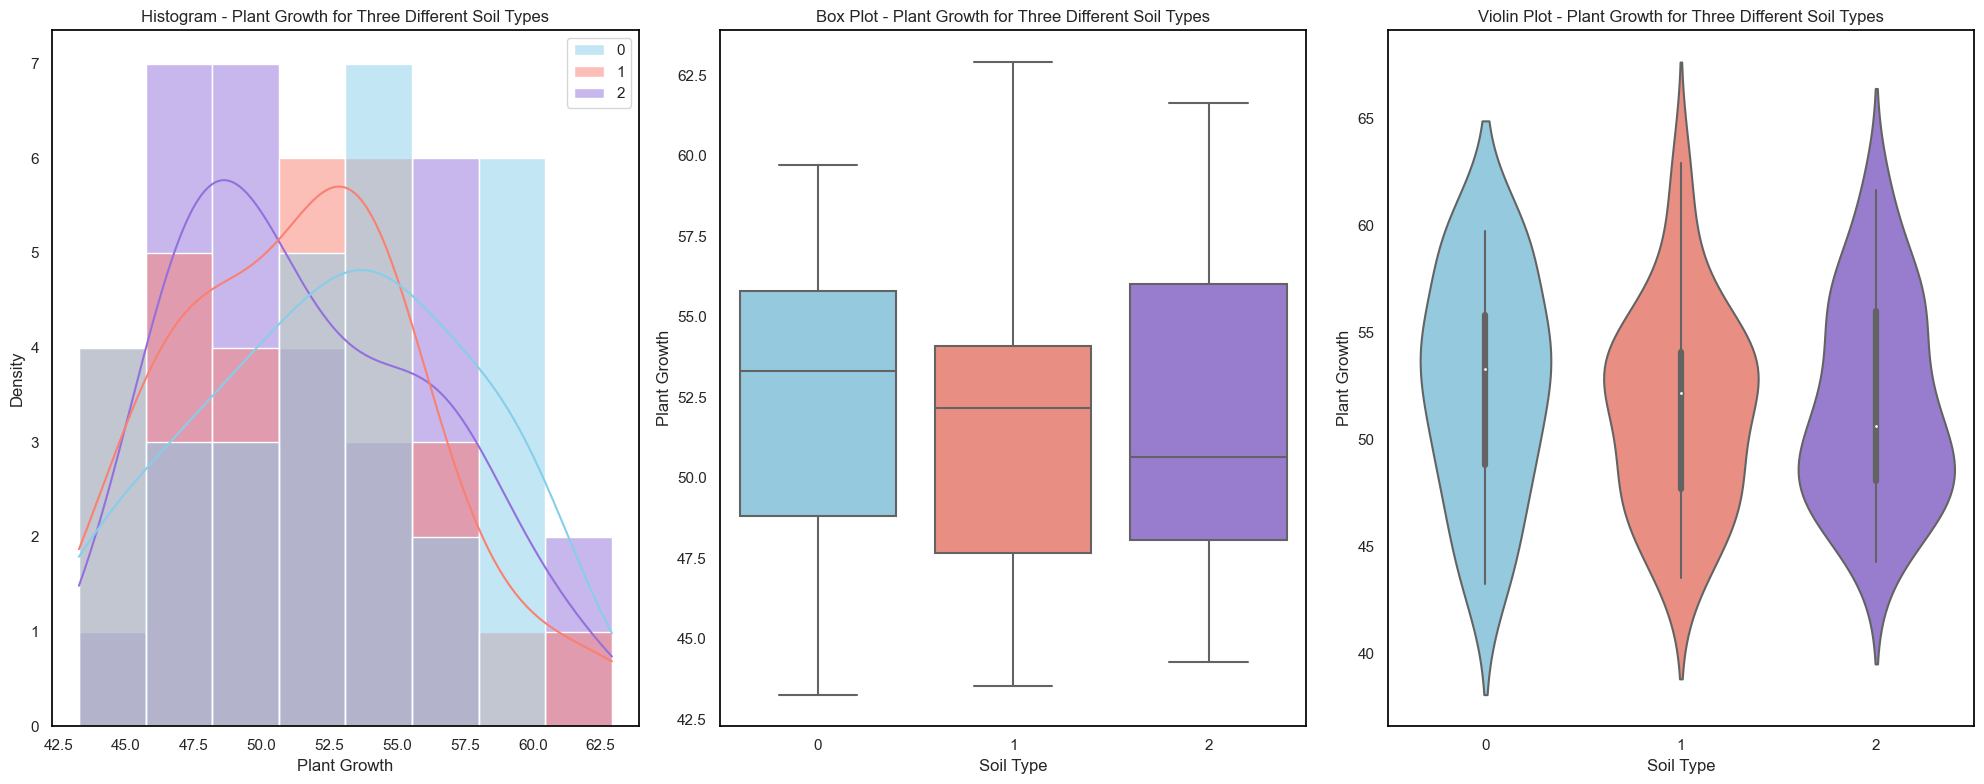

In [142]:
# Example 2: Assessing the impact of different soil types on plant growth
soil1_plant_growth = np.random.normal(loc=50, scale=5, size=30)  # Plant growth for soil type 1
soil2_plant_growth = np.random.normal(loc=51, scale=5, size=30)  # Plant growth for soil type 2
soil3_plant_growth = np.random.normal(loc=52, scale=5, size=30)  # Plant growth for soil type 3

# Perform Kruskal-Wallis H test for Example 2
statistic_2, p_value_2 = kruskal(soil1_plant_growth, soil2_plant_growth, soil3_plant_growth)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Assessing the impact of different soil types on plant growth:")
print("Kruskal-Wallis H statistic:", statistic_2)
print("p-value:", p_value_2)
if p_value_2 < 0.05:
    print("Result: Reject the null hypothesis. The distributions of plant growth for different soil types are likely not equal.")
else:
    print("Result: Fail to reject the null hypothesis. The distributions of plant growth for different soil types are likely equal.")

# Plot the distributions of plant growth for each soil type for Example 2 using histplot, boxplot, and violin plot
plt.figure(figsize=(20, 8))

# Histogram for Example 2
plt.subplot(1, 3, 1)
sns.histplot(data=[soil1_plant_growth, soil2_plant_growth, soil3_plant_growth], kde=True, palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Histogram - Plant Growth for Three Different Soil Types')
plt.xlabel('Plant Growth')
plt.ylabel('Density')
plt.grid(False)  

# Box plot for Example 2
plt.subplot(1, 3, 2)
sns.boxplot(data=[soil1_plant_growth, soil2_plant_growth, soil3_plant_growth], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Box Plot - Plant Growth for Three Different Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Plant Growth')
plt.grid(False) 

# Violin plot for Example 2
plt.subplot(1, 3, 3)
sns.violinplot(data=[soil1_plant_growth, soil2_plant_growth, soil3_plant_growth], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Violin Plot - Plant Growth for Three Different Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Plant Growth')
plt.grid(False)  

plt.tight_layout()
plt.show()

### <font color='blueviolet'> Friedman Test

**Purpose**

Tests whether the distributions of two or more independent samples are equal or not.


**Assumptions**

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

**Interpretation**

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

**Examples:**

<font color='royalblue'> **Example 1:**

Evaluating the preference rankings of several products by the same group of consumers.

<font color='royalblue'> **Example 2:** 

Assessing the perceived stress levels of individuals before and after participating in different relaxation techniques.

**Python Code:**


Example 1 - Evaluating the preference rankings of several products:
Friedman test statistic: 1.8571428571428386
p-value: 0.395117761326891
Result: Fail to reject the null hypothesis. The preference rankings of the products are likely equal.


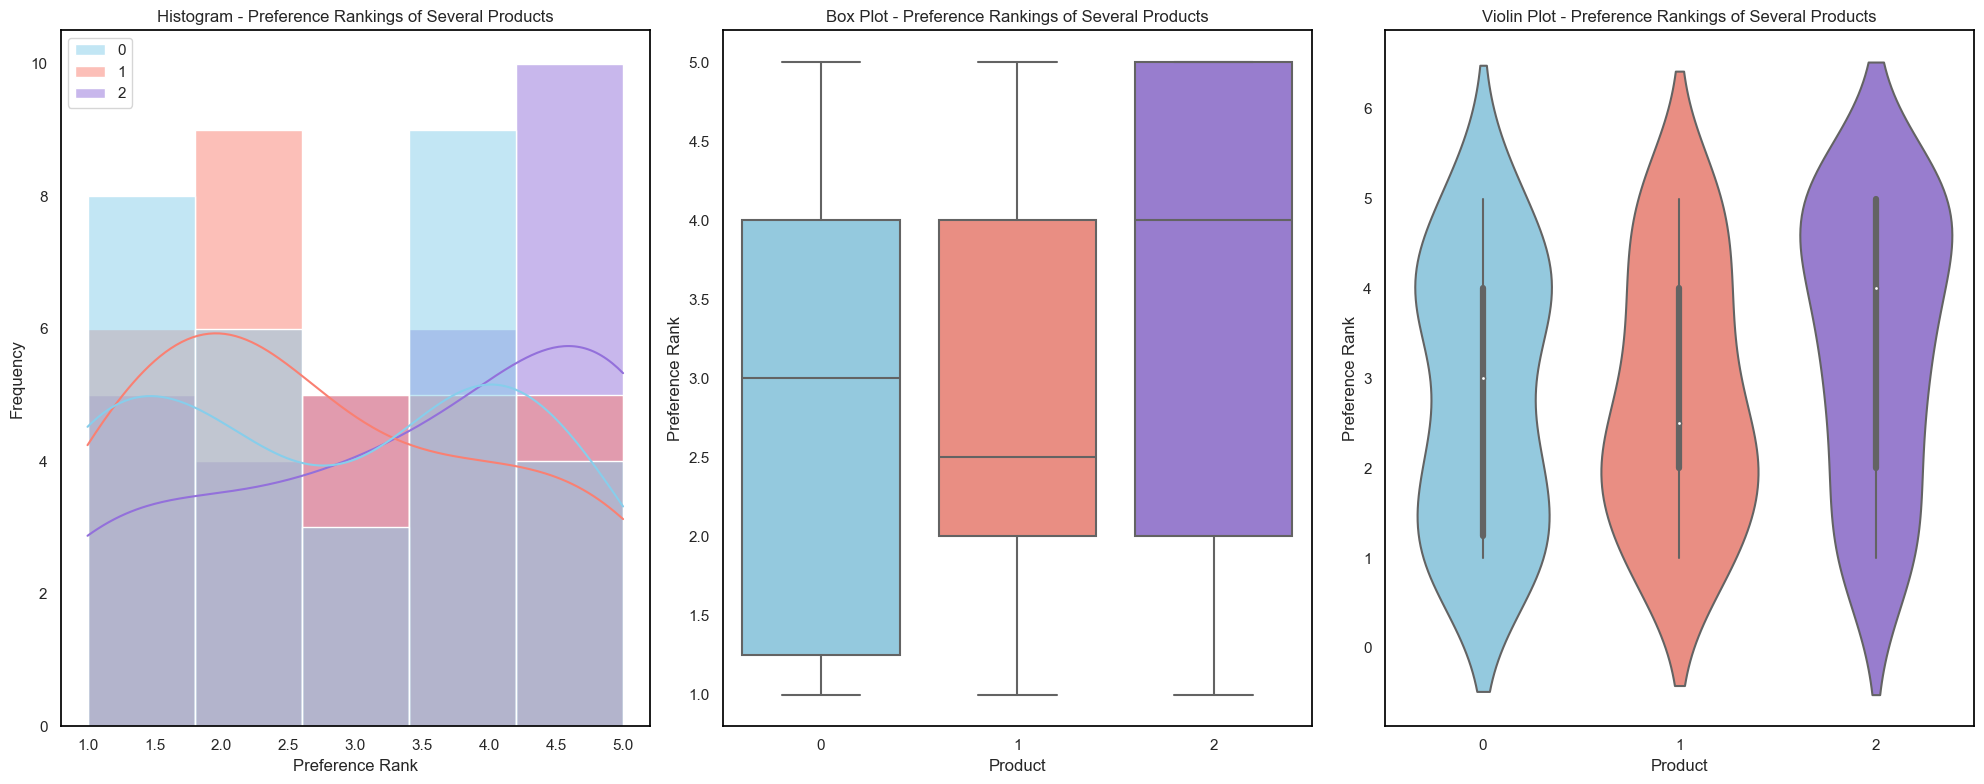

In [143]:
from scipy.stats import friedmanchisquare

# Set default plot settings
plt.rcParams['axes.grid'] = False
sns.set(style="whitegrid")
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  

# Set random seed for reproducibility
np.random.seed(0)

# Example 1: Evaluating the preference rankings of several products by the same group of consumers
product1_preference = np.random.randint(1, 6, size=30)  # Preference rankings for product 1
product2_preference = np.random.randint(1, 6, size=30)  # Preference rankings for product 2
product3_preference = np.random.randint(1, 6, size=30)  # Preference rankings for product 3

# Perform Friedman test for Example 1
statistic_1, p_value_1 = friedmanchisquare(product1_preference, product2_preference, product3_preference)

# Print the test results and interpretation for Example 1
print("\nExample 1 - Evaluating the preference rankings of several products:")
print("Friedman test statistic:", statistic_1)
print("p-value:", p_value_1)
if p_value_1 < 0.05:
    print("Result: Reject the null hypothesis. The preference rankings of the products are likely not equal.")
else:
    print("Result: Fail to reject the null hypothesis. The preference rankings of the products are likely equal.")

# Plot the distributions of preference rankings for each product for Example 1 using histplot, boxplot, and violin plot
plt.figure(figsize=(20, 8))

# Histogram for Example 1
plt.subplot(1, 3, 1)
sns.histplot(data=[product1_preference, product2_preference, product3_preference], bins=5, kde=True, palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Histogram - Preference Rankings of Several Products')
plt.xlabel('Preference Rank')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid

# Box plot for Example 1
plt.subplot(1, 3, 2)
sns.boxplot(data=[product1_preference, product2_preference, product3_preference], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Box Plot - Preference Rankings of Several Products')
plt.xlabel('Product')
plt.ylabel('Preference Rank')
plt.grid(False)  # Remove grid

# Violin plot for Example 1
plt.subplot(1, 3, 3)
sns.violinplot(data=[product1_preference, product2_preference, product3_preference], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Violin Plot - Preference Rankings of Several Products')
plt.xlabel('Product')
plt.ylabel('Preference Rank')
plt.grid(False)  # Remove grid

plt.tight_layout()
plt.show()


Example 2 - Assessing the perceived stress levels of individuals before and after different relaxation techniques:
Friedman test statistic: 6.066666666666663
p-value: 0.04815485412119648
Result: Reject the null hypothesis. The perceived stress levels before and after different relaxation techniques are likely not equal.


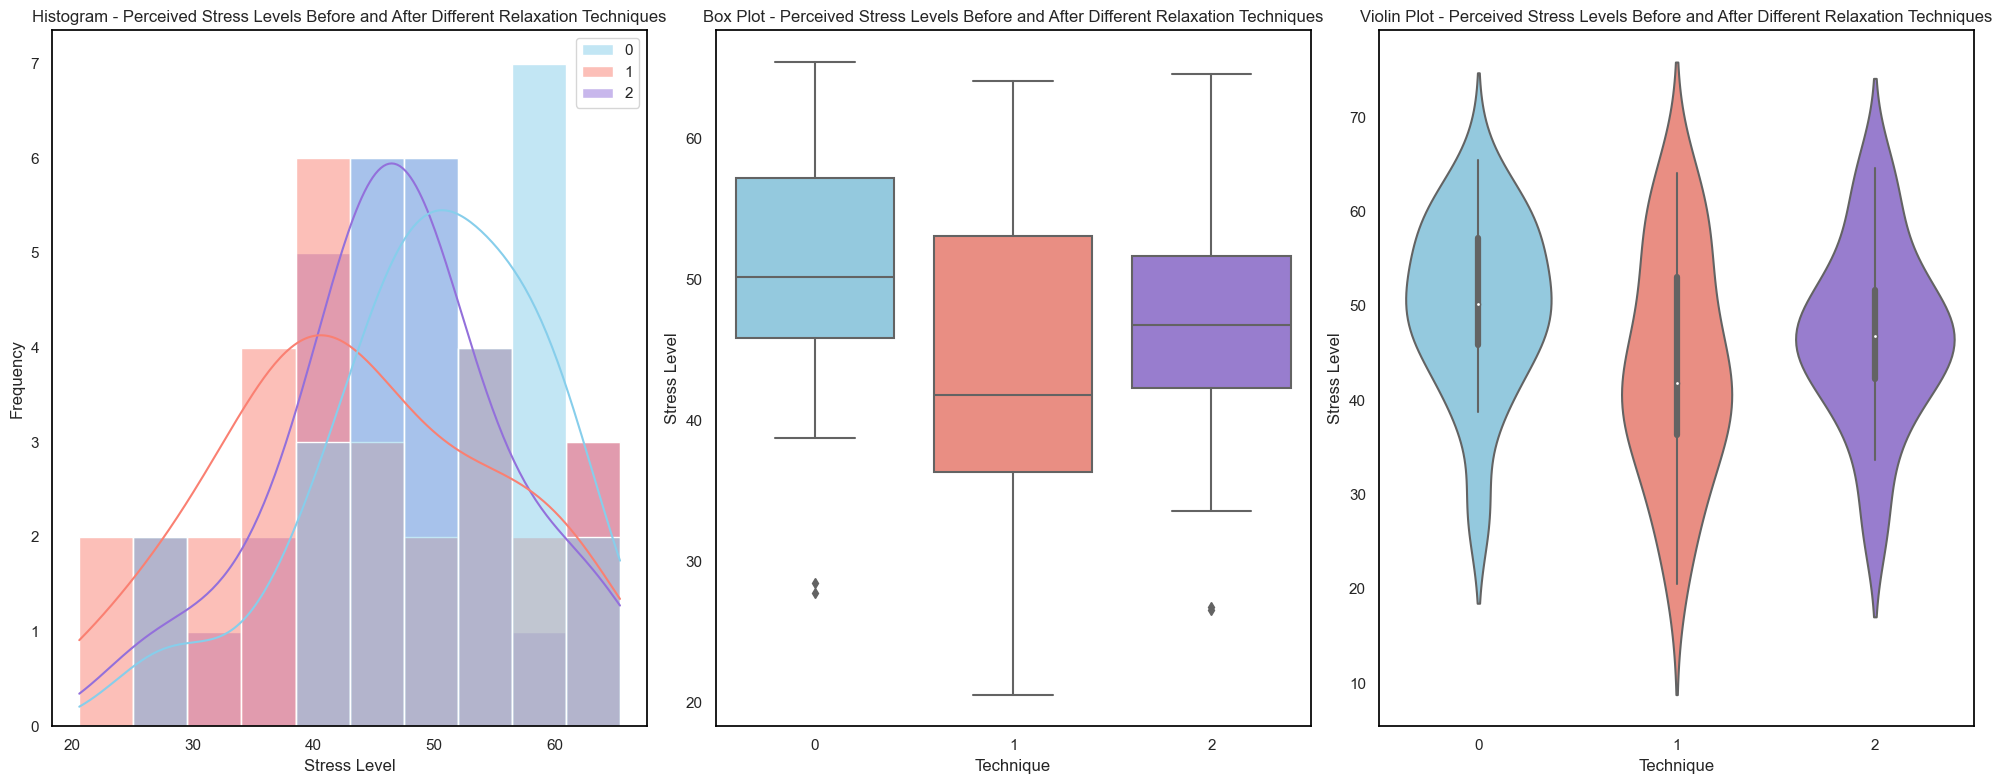

In [144]:
# Example 2: Assessing the perceived stress levels of individuals before and after participating in different relaxation techniques
technique1_stress_levels = np.random.normal(loc=50, scale=10, size=30)  # Stress levels for relaxation technique 1
technique2_stress_levels = np.random.normal(loc=45, scale=10, size=30)  # Stress levels for relaxation technique 2
technique3_stress_levels = np.random.normal(loc=48, scale=10, size=30)  # Stress levels for relaxation technique 3

# Perform Friedman test for Example 2
statistic_2, p_value_2 = friedmanchisquare(technique1_stress_levels, technique2_stress_levels, technique3_stress_levels)

# Print the test results and interpretation for Example 2
print("\nExample 2 - Assessing the perceived stress levels of individuals before and after different relaxation techniques:")
print("Friedman test statistic:", statistic_2)
print("p-value:", p_value_2)
if p_value_2 < 0.05:
    print("Result: Reject the null hypothesis. The perceived stress levels before and after different relaxation techniques are likely not equal.")
else:
    print("Result: Fail to reject the null hypothesis. The perceived stress levels before and after different relaxation techniques are likely equal.")


# Plot the distributions of stress levels before and after different relaxation techniques for Example 2 using histplot, boxplot, and violin plot
plt.figure(figsize=(20, 8))

# Histogram for Example 2
plt.subplot(1, 3, 1)
sns.histplot(data=[technique1_stress_levels, technique2_stress_levels, technique3_stress_levels], bins=10, kde=True, palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Histogram - Perceived Stress Levels Before and After Different Relaxation Techniques')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid

# Box plot for Example 2
plt.subplot(1, 3, 2)
sns.boxplot(data=[technique1_stress_levels, technique2_stress_levels, technique3_stress_levels], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Box Plot - Perceived Stress Levels Before and After Different Relaxation Techniques')
plt.xlabel('Technique')
plt.ylabel('Stress Level')
plt.grid(False)  # Remove grid

# Violin plot for Example 2
plt.subplot(1, 3, 3)
sns.violinplot(data=[technique1_stress_levels, technique2_stress_levels, technique3_stress_levels], palette=['skyblue', 'salmon', 'mediumpurple'])
plt.title('Violin Plot - Perceived Stress Levels Before and After Different Relaxation Techniques')
plt.xlabel('Technique')
plt.ylabel('Stress Level')
plt.grid(False)  # Remove grid

plt.tight_layout()
plt.show()

<font color='mediumvioletred'> **Mann-Whitney U Test**

**Advantages:**

Suitable for comparing distributions of two independent samples, regardless of their sample sizes.
Does not require the assumption of normality.
Robust to outliers.

**Disadvantages:**

Assumes that observations can be ranked.
Less powerful than parametric tests when data meet parametric assumptions.

**Power:**

Moderate to high power for detecting differences between distributions, especially with larger sample sizes.

**Sensitivity:**

Sensitive to differences in the medians of distributions.

**Ease of Interpretation:**

Straightforward interpretation of the p-value:
Reject the null hypothesis if p-value < significance level.

**Common Usage:**

Widely used in various fields, especially when normality assumptions are violated or for ordinal data.

<font color='mediumvioletred'> **Wilcoxon Signed-Rank Test**

**Advantages:**

Specifically designed for comparing paired samples.
Robust to outliers and non-normality.
Suitable for small sample sizes.

**Disadvantages:**

Assumes that observations can be ranked.
Less powerful than parametric tests when data meet parametric assumptions.

**Power:**

Moderate power for detecting differences between paired samples.

**Sensitivity:**

Sensitive to differences in the medians of paired samples.

**Ease of Interpretation:**

Interpretation of the p-value is similar to the Mann-Whitney U Test.

**Common Usage:**

Frequently used in medical and psychological research for analyzing before-after treatment effects.

<font color='mediumvioletred'> **Kruskal-Wallis H Test**

**Advantages:**

Extends the Mann-Whitney U Test to more than two independent samples.
Robust to outliers and non-normality.
Does not require equal sample sizes.

**Disadvantages:**

Assumes that observations can be ranked.
Less powerful than parametric tests when data meet parametric assumptions.

**Power:**

Moderate power for detecting differences among multiple independent samples.

**Sensitivity:**

Sensitive to differences in the medians of multiple independent samples.

**Ease of Interpretation:**

Interpretation of the p-value is similar to the Mann-Whitney U Test.

**Common Usage:**

Commonly used when comparing multiple groups in non-parametric settings, such as comparing treatment effects in clinical trials.

<font color='mediumvioletred'> **Friedman Test**

**Advantages:**

Specifically designed for comparing multiple paired samples.
Non-parametric alternative to repeated measures ANOVA.
Robust to outliers and non-normality.

**Disadvantages:**

Assumes that observations can be ranked.
Less powerful than parametric tests when data meet parametric assumptions.

**Power:**

Moderate power for detecting differences among multiple paired samples.

**Sensitivity:**

Sensitive to differences in the medians of multiple paired samples.

**Ease of Interpretation:**

Interpretation of the p-value is similar to the Mann-Whitney U Test.

**Common Usage:**

Frequently used in experimental designs with repeated measures or matched groups.

<font color='mediumvioletred'> **Overall Comparison:**

**Power:**

Mann-Whitney U Test, Wilcoxon Signed-Rank Test, Kruskal-Wallis H Test, and Friedman Test have moderate power for detecting differences between distributions or among multiple groups.

**Sensitivity:**

All tests are sensitive to differences in the medians of distributions or paired samples.

**Ease of Interpretation:**

Interpretation of the p-value is straightforward for all tests:

Reject the null hypothesis if p-value < significance level.

**Common Usage:**

Mann-Whitney U Test and Wilcoxon Signed-Rank Test are widely used in various fields, especially when normality assumptions are violated or for ordinal data.
Kruskal-Wallis H Test and Friedman Test are commonly used when comparing multiple groups or paired samples in non-parametric settings.

<font color='mediumvioletred'> **Summary:**

* The Mann-Whitney U Test and Wilcoxon Signed-Rank Test are suitable for comparing two groups, with the latter specifically designed for paired samples.
* Kruskal-Wallis H Test and Friedman Test extend these tests to multiple groups or paired samples, respectively.
* All tests are robust to non-normality and outliers.
* The choice among these tests depends on the research design, such as the number of groups and whether the samples are paired or independent.